<a href="https://colab.research.google.com/github/Rishabhydv38/Stock-Analysis-/blob/main/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Name: Rishabh Yadav***
> **CodeClause |> *july/2023***
>> **Data Science Intern |>
>>> **Task1 >> *Stock Analysis***
---

In [ ]:
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import seaborn as sns

from datetime import datetime

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
!pip install jovian opendatasets --upgrade --quiet
!pip install -q kaggle

import urllib.request
import opendatasets as od

In [ ]:
df = pd.read_csv('AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000


# New Section

Text(0.5, 1.0, 'Stock Volume versus Time')

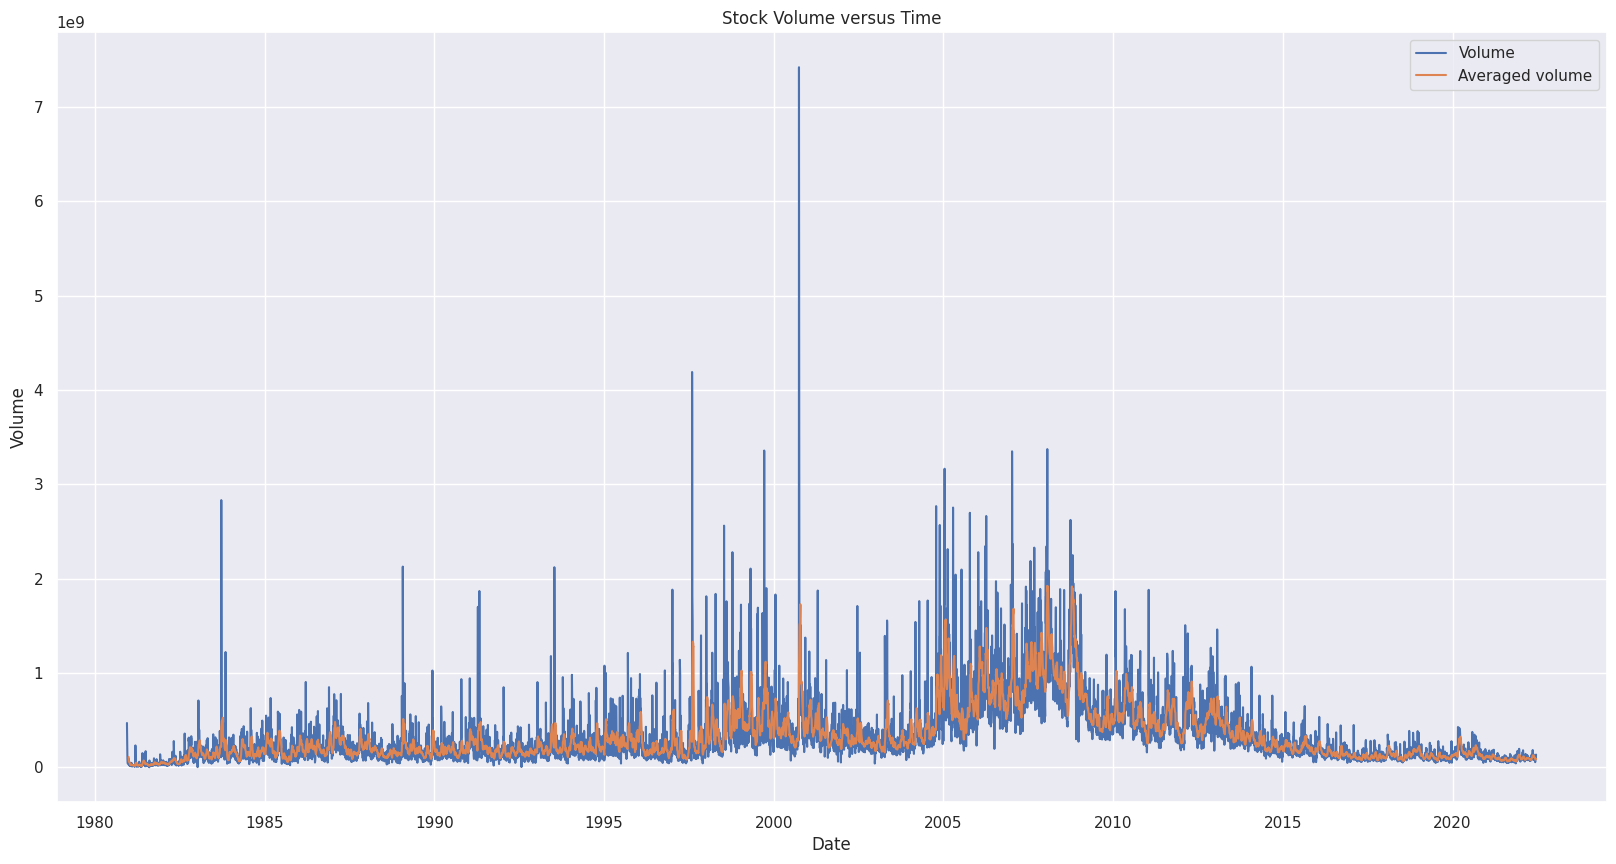

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x=df.index,y=df['Volume'],label='Volume')
sns.lineplot(x=df.index,y=df['Volume'].rolling(window=12).mean(),label='Averaged volume')
plt.title('Stock Volume versus Time')

<Axes: title={'center': 'Apple Stock Price through Time'}, xlabel='Date'>

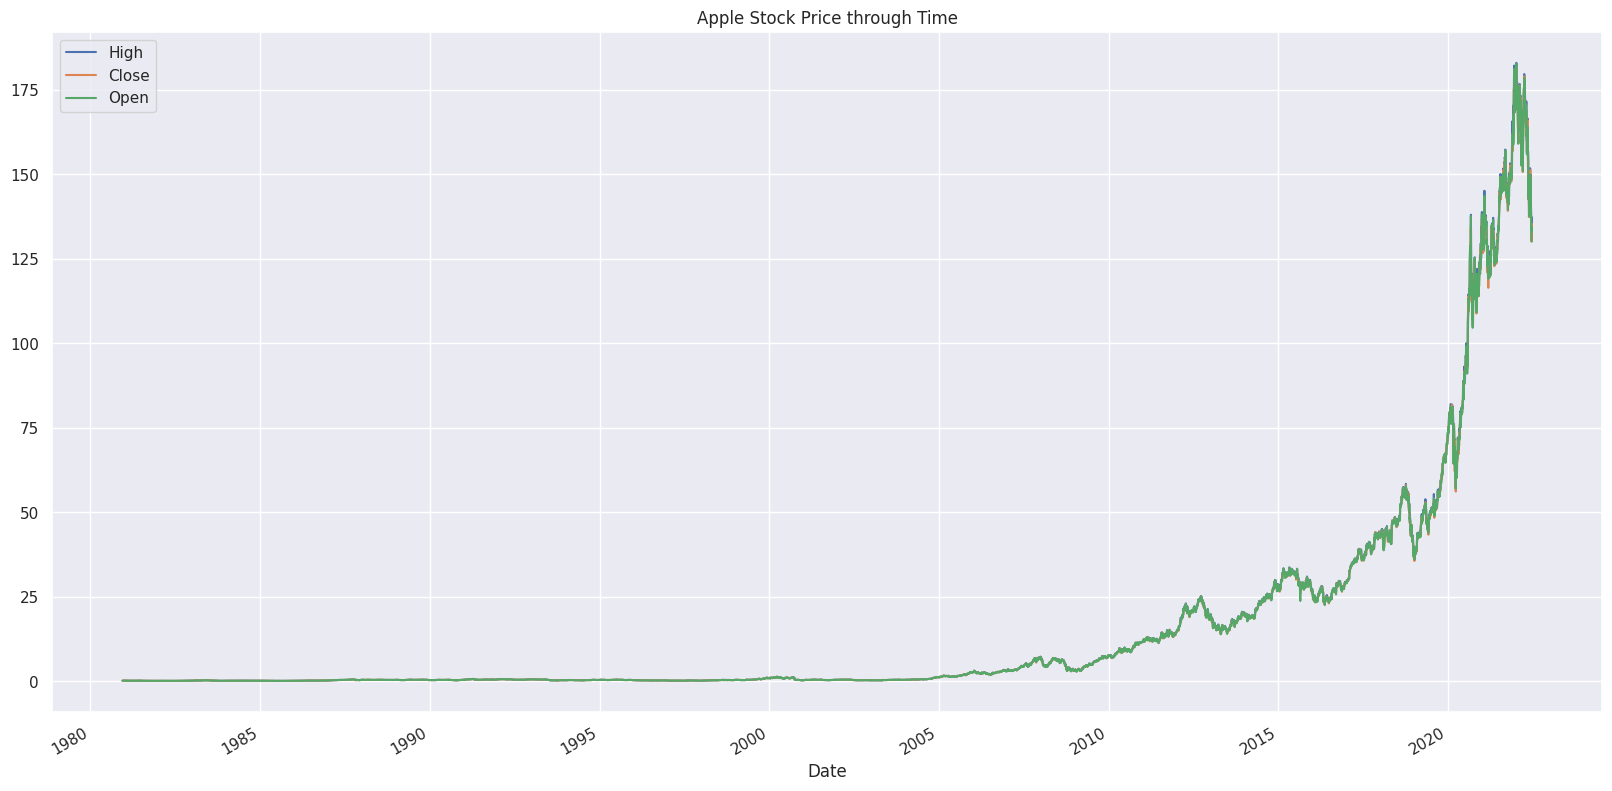

In [ ]:
df.plot(y=['High','Close','Open'],title='Apple Stock Price through Time')

<Axes: xlabel='Year'>

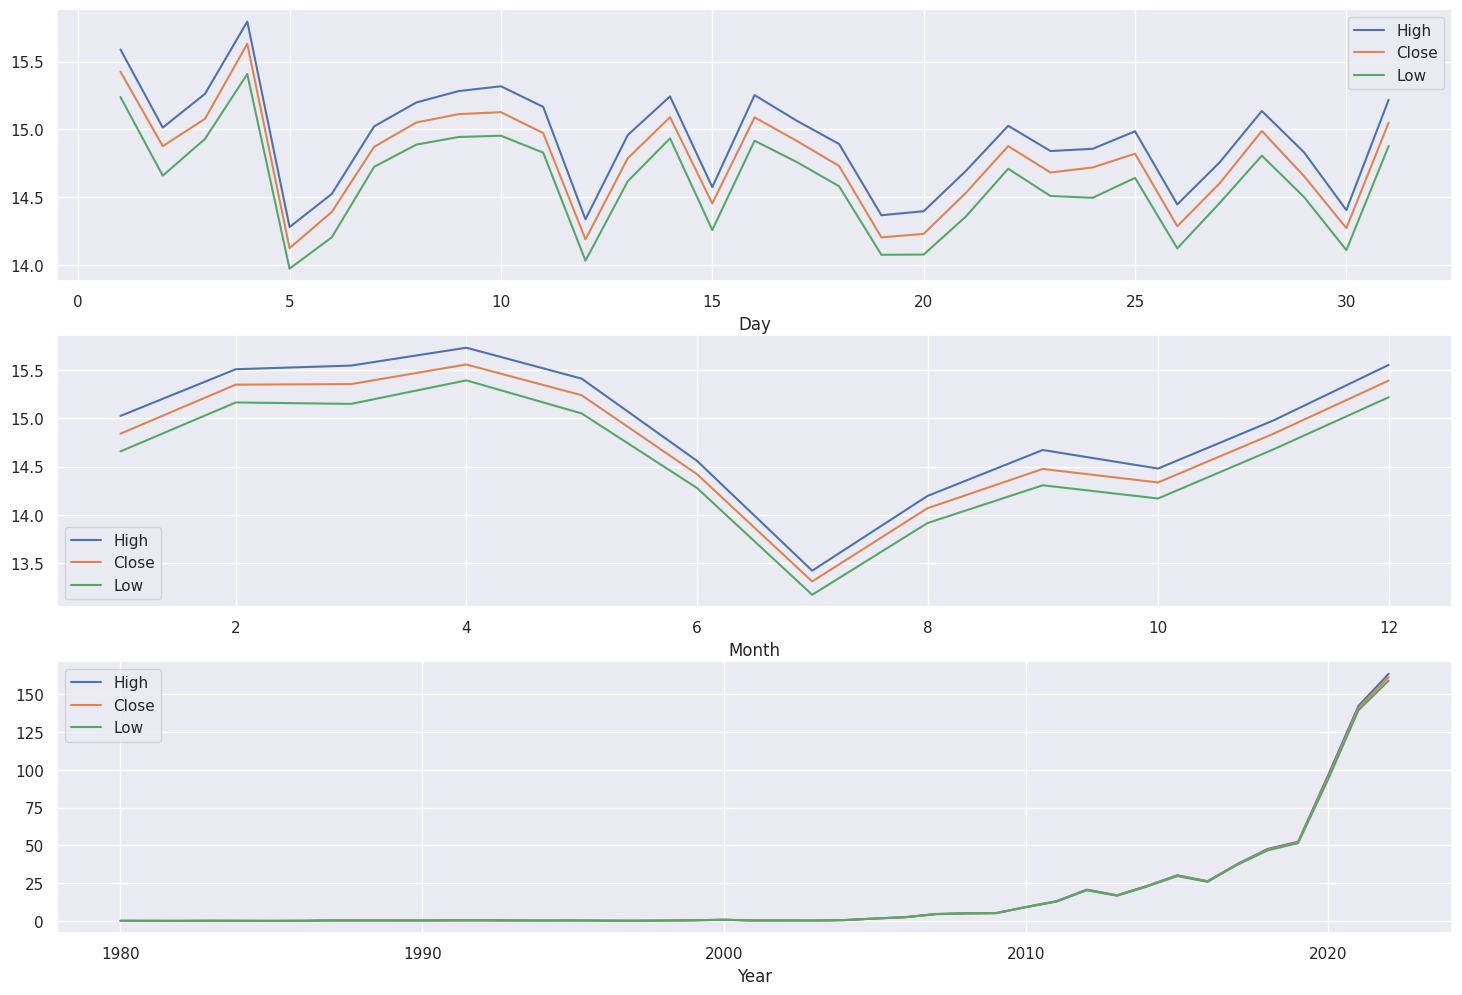

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(18, 12))

df.groupby(df.index.day).mean().plot(y=['High', 'Close', 'Low'], ax=ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y=['High', 'Close', 'Low'], ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y=['High', 'Close', 'Low'], ax=ax3, xlabel='Year')

<Axes: xlabel='Year'>

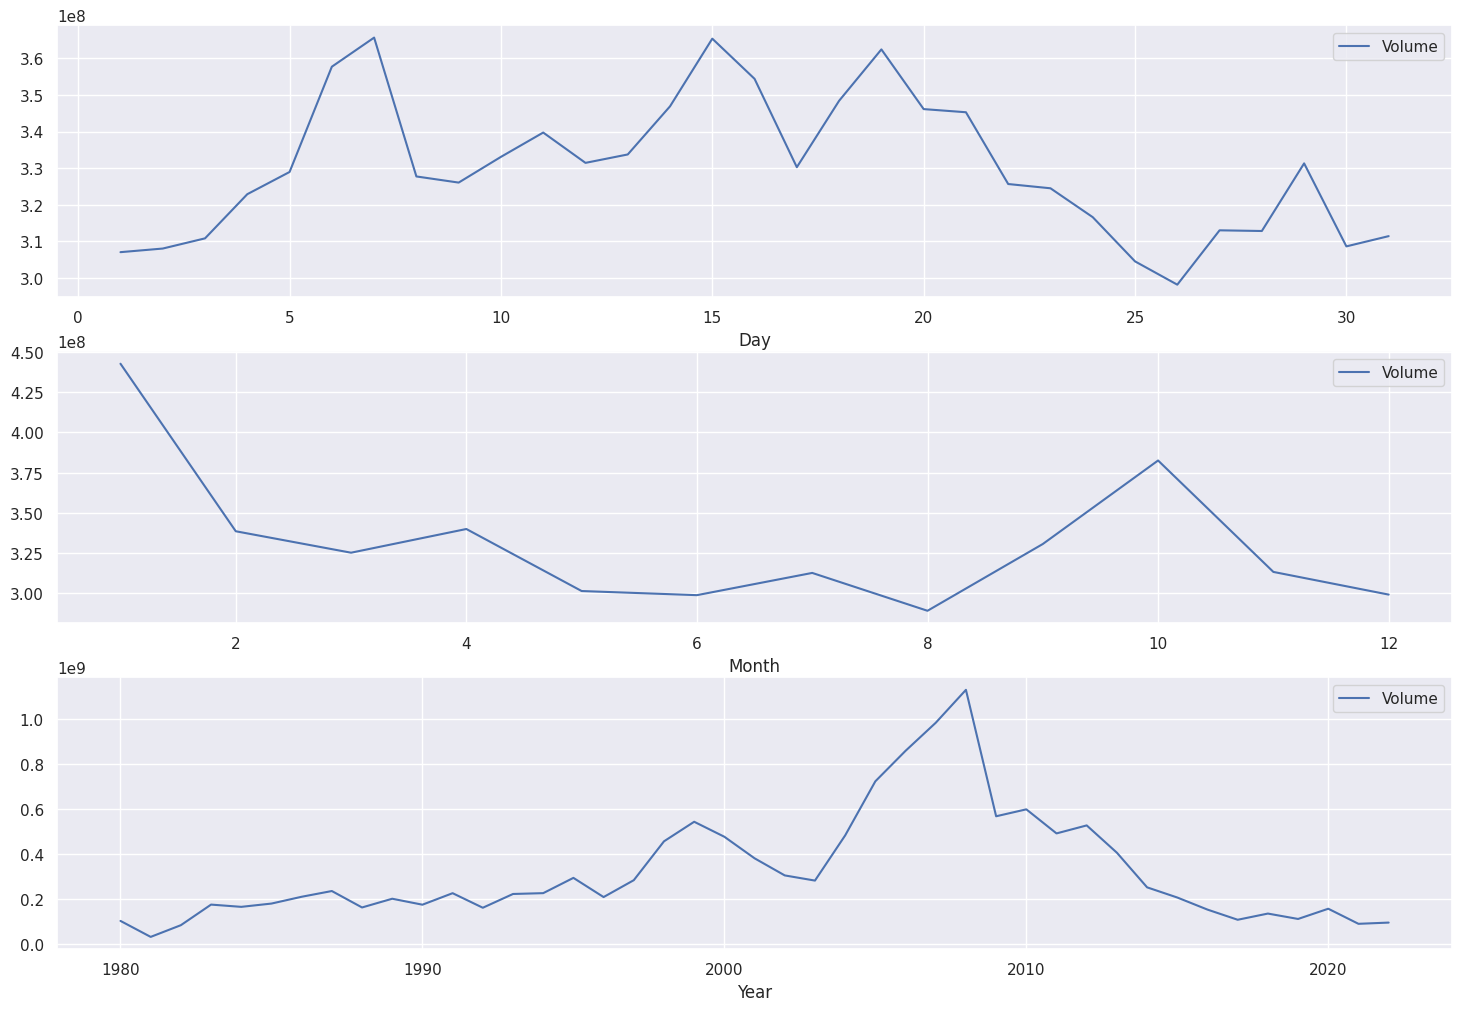

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(18, 12))

df.groupby(df.index.day).mean().plot(y='Volume', ax=ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y='Volume', ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y='Volume', ax=ax3, xlabel='Year')

In [ ]:
def plot_mean_std_time(data, featureName, chunkSize, title):
    feature = data[featureName]
    chunks = np.split(feature, chunkSize)

    means = [np.mean(chunk) for chunk in chunks]
    stds = [np.std(chunk) for chunk in chunks]
    title += ' -> through Time'

    plt.title(title)

    plt.plot(np.arange(len(means)), [feature.mean()] * len(means), label='Global [Mean]', lw=1.5, color='green')
    plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100, color='green')

    plt.plot(np.arange(len(stds)), [feature.std()] * len(stds), label='Global [STD]', lw=1.5, color='orange')
    plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', s=100, color='orange')

    plt.legend()

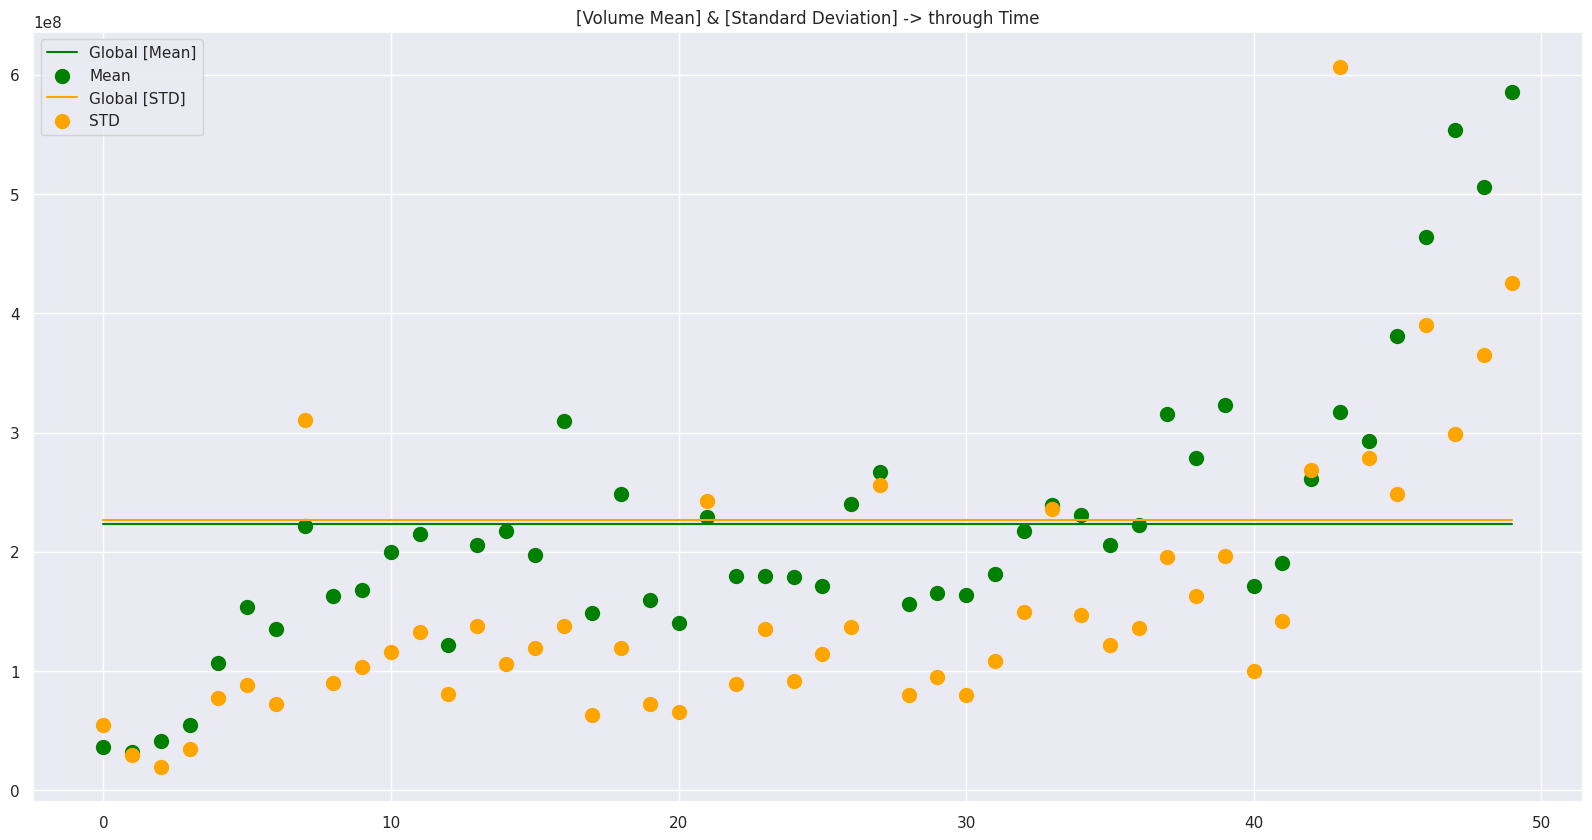

In [ ]:
plot_mean_std_time(df.iloc[:4800], 'Volume', 50, '[Volume Mean] & [Standard Deviation]')

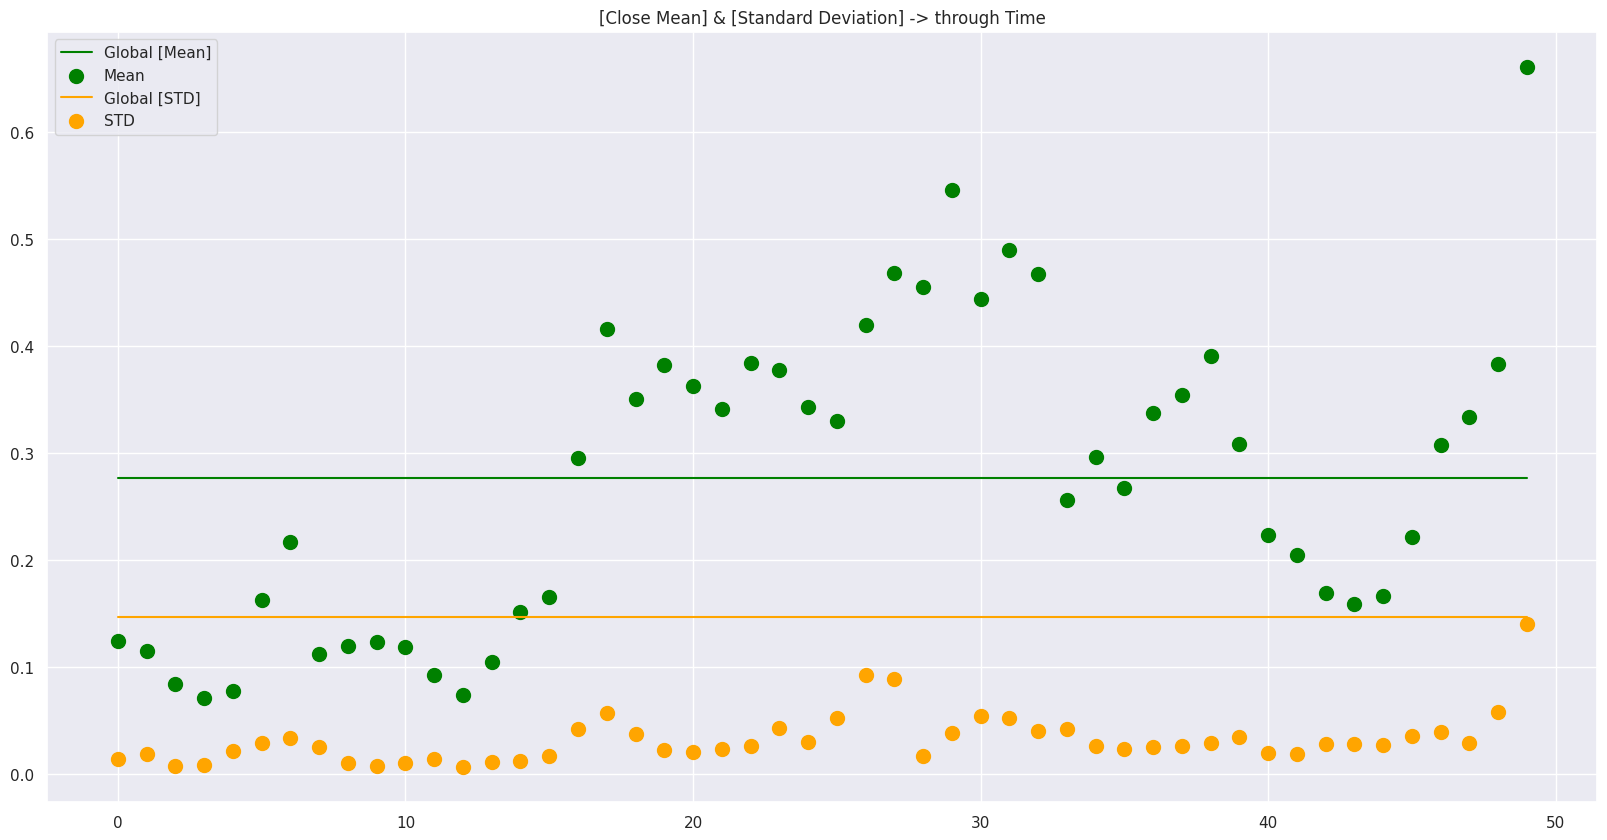

In [ ]:
plot_mean_std_time(df.iloc[:4800], 'Close', 50, '[Close Mean] & [Standard Deviation]')

Text(0.5, 1.0, 'Volume Autocorrelation')

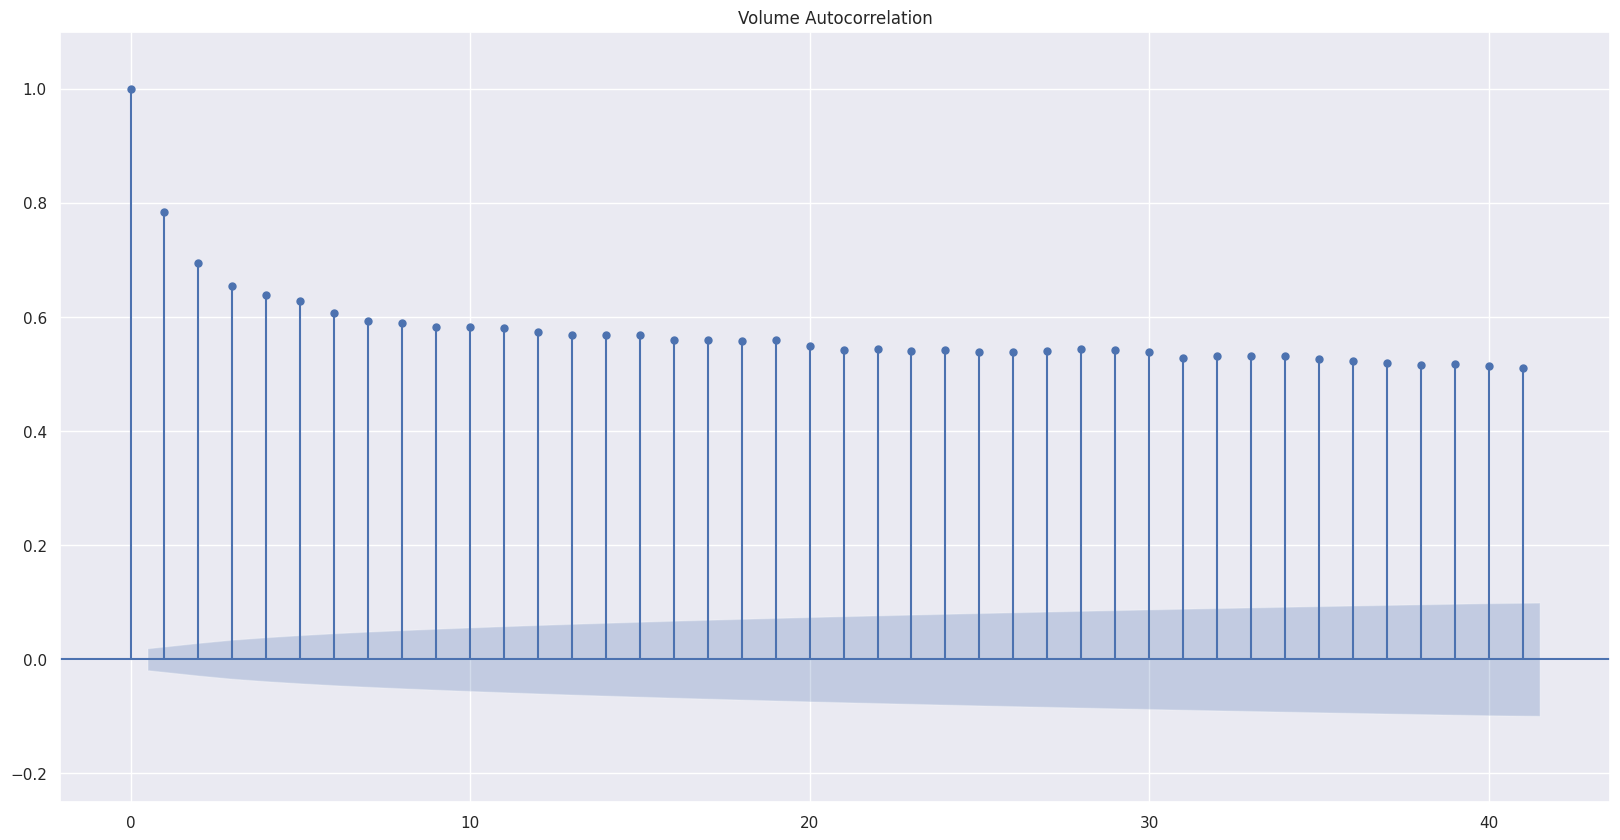

In [ ]:
plot_acf(df['Volume'])
plt.ylim([-0.25, 1.1])
plt.title('Volume Autocorrelation')

Text(0.5, 1.0, 'Close Autocorrelation')

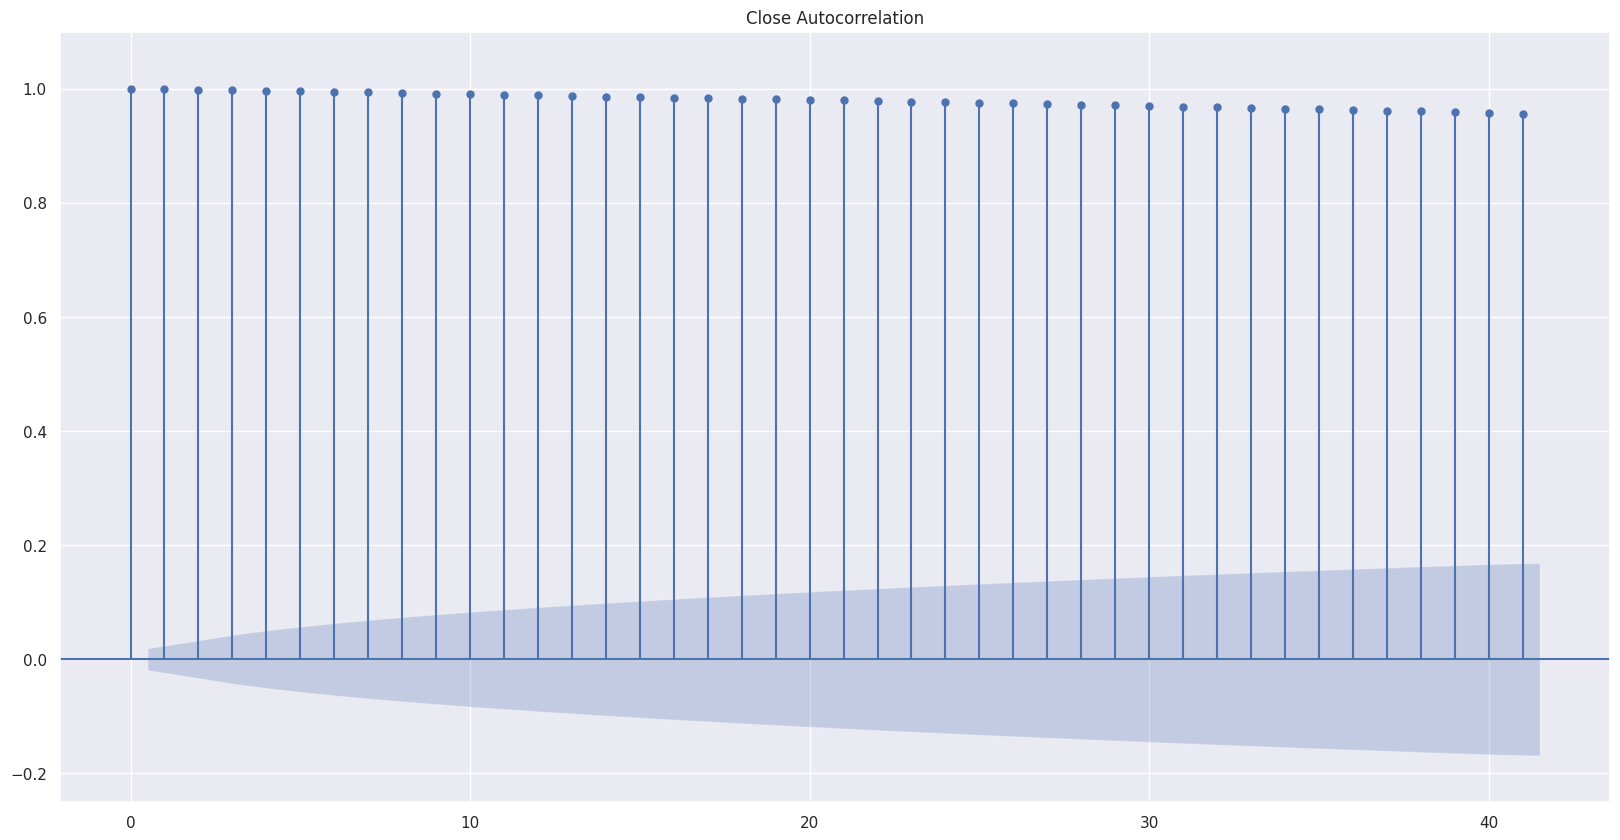

In [ ]:
plot_acf(df['Close'])
plt.ylim([-0.25, 1.1])
plt.title('Close Autocorrelation')

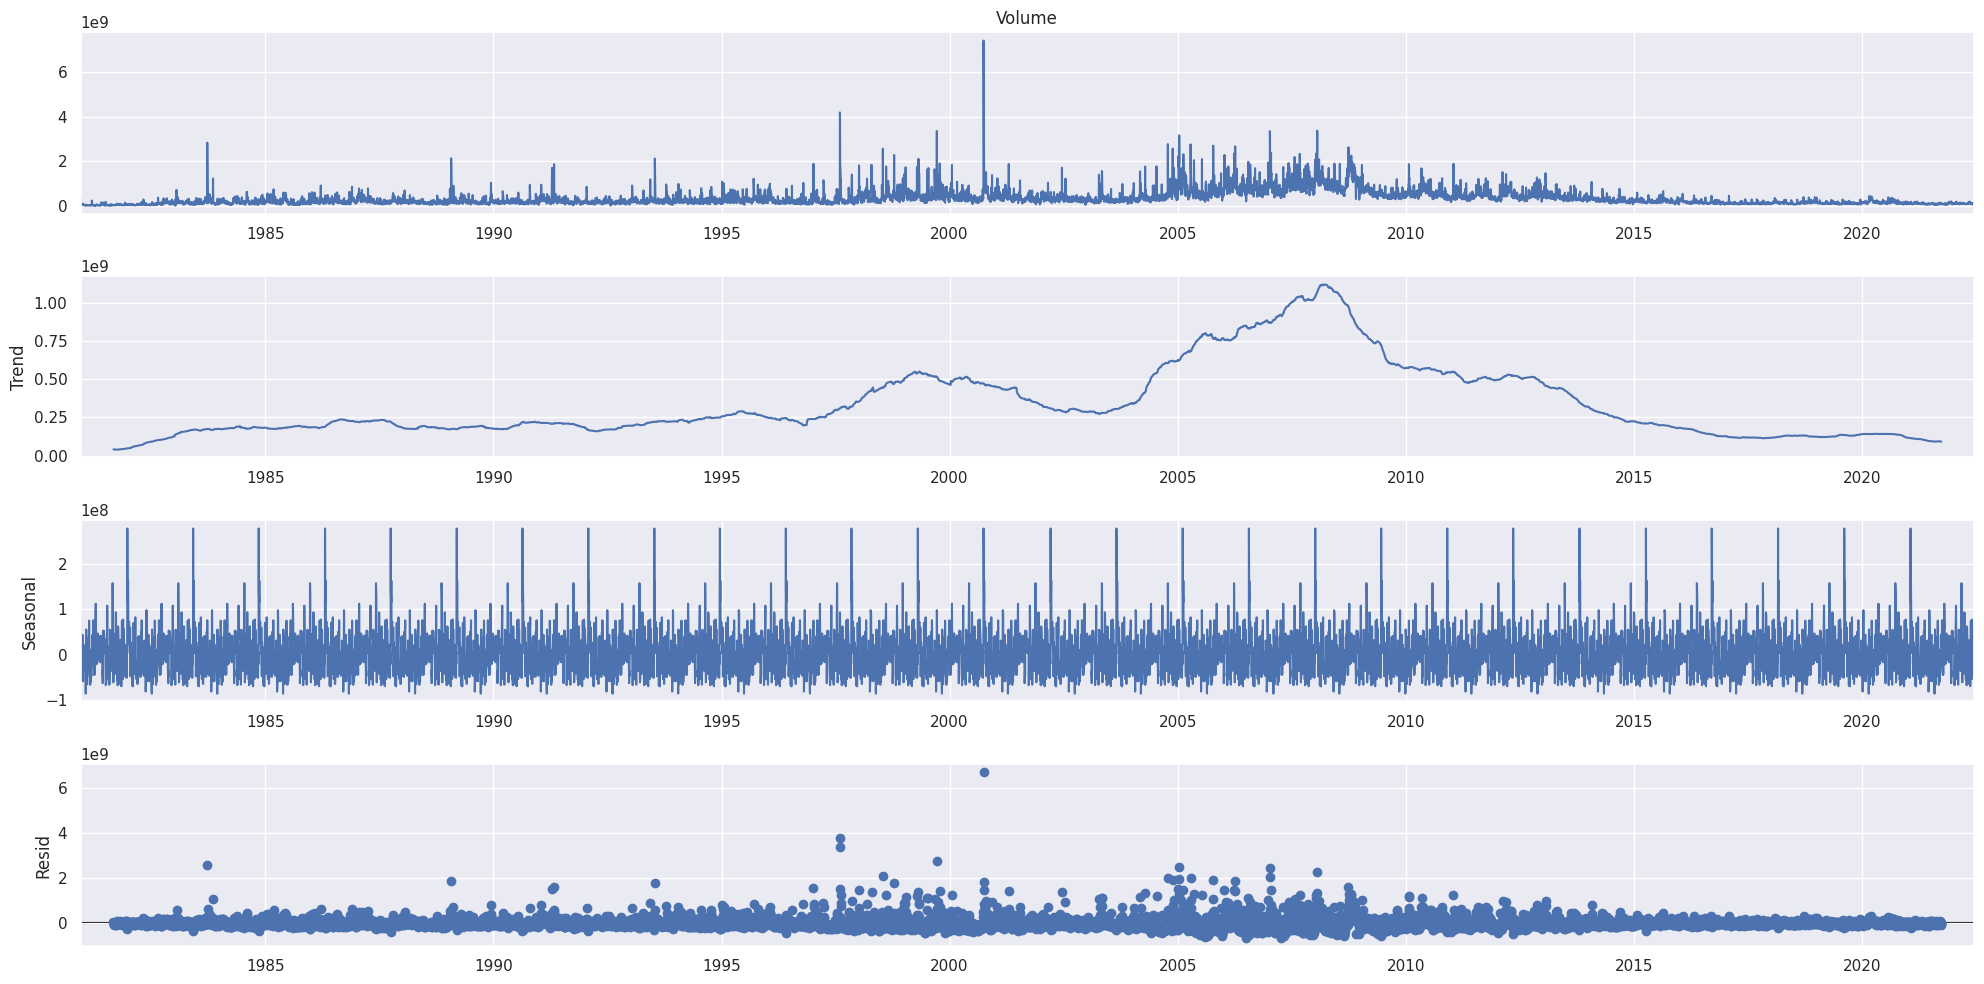

In [ ]:
seasonal_decompose(df['Volume'], period=365, model='additive').plot();

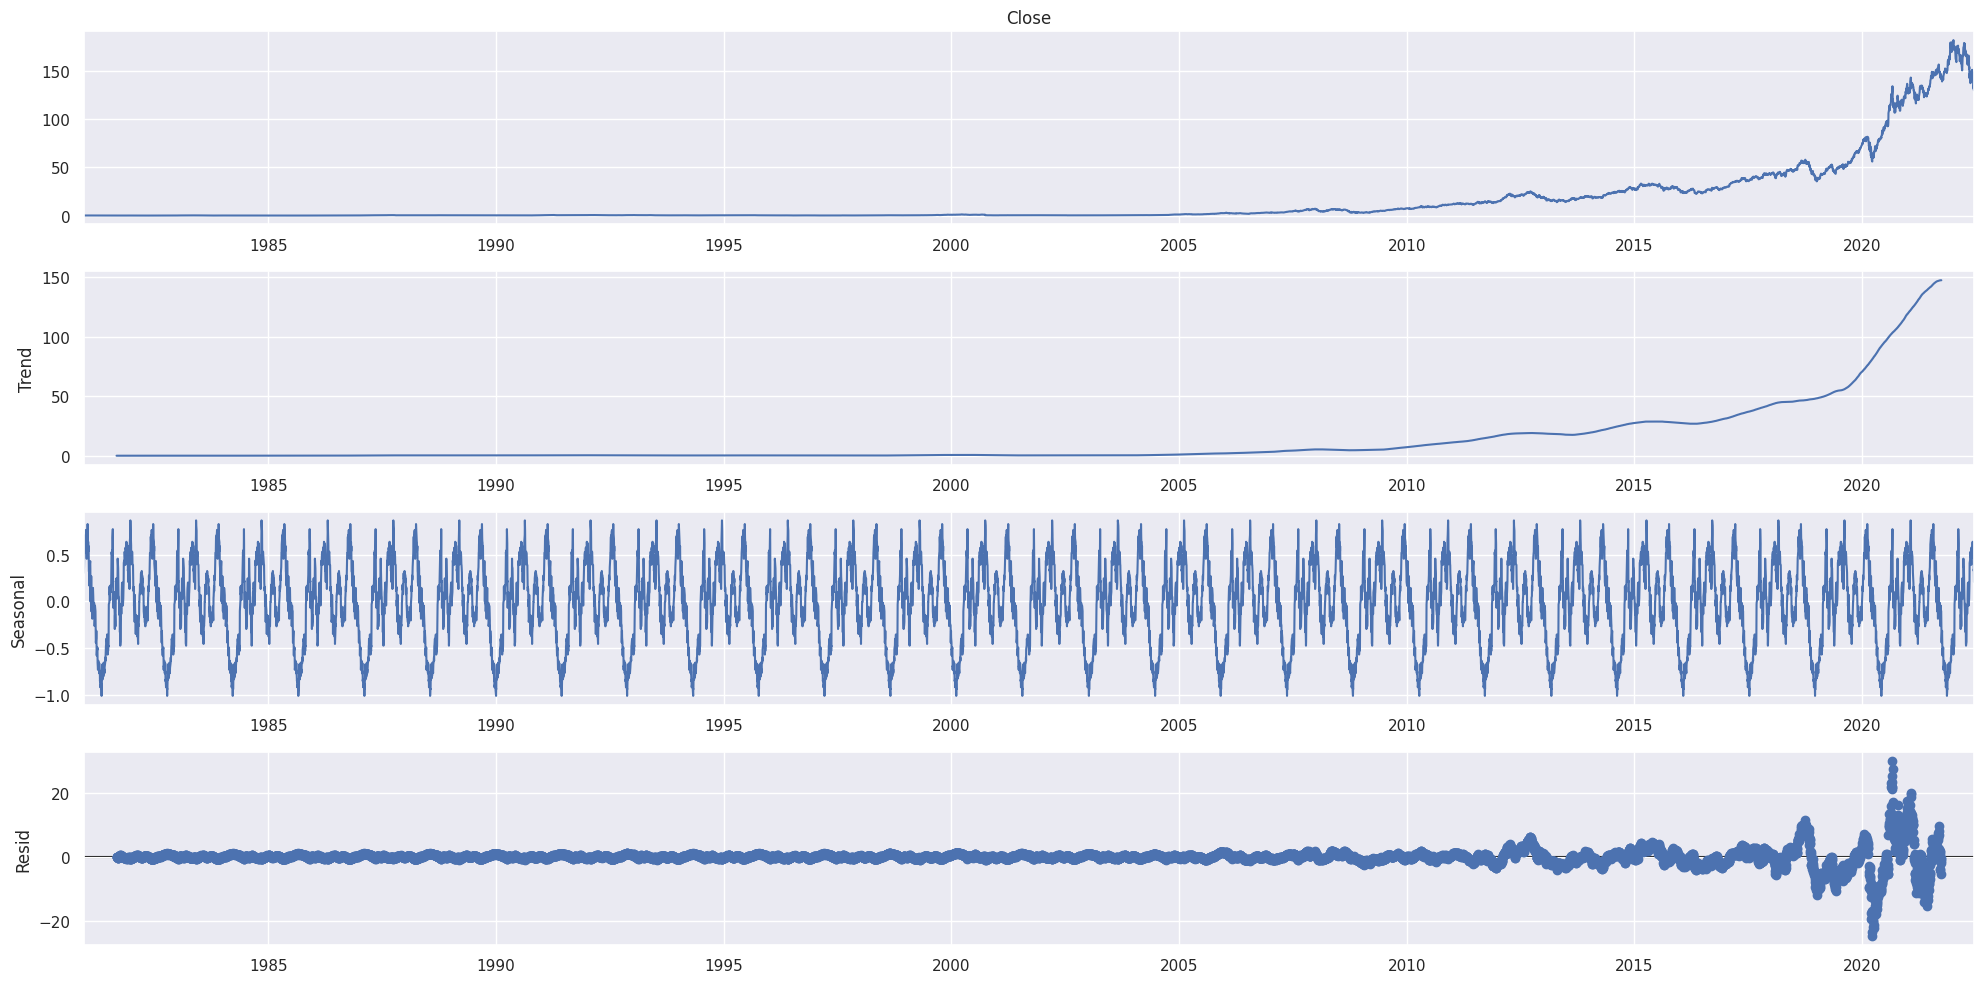

In [ ]:
seasonal_decompose(df['Close'], period=365, model='additive').plot();

> ### |> ***Stationary Test (ADF Test)***
>> Augmented Dickey Fuller test (ADF Test)
- is a common statistical test used to test whether a given Time series is stationary or not.

In [ ]:
adf_df = pd.DataFrame(data=adfuller(df['Close']),
                      columns=['Values'],
                      index=['Test statistic',
                             'P-value',
                             'Number of lags',
                             'Number of observation',
                             'Critical values',
                             'Information criteria']
                      )
adf_df

,Values
Test statistic,1.473141
P-value,0.997422
Number of lags,39
Number of observation,10428
Critical values,"{'1%': -3.430977244959254, '5%': -2.8618172062..."
Information criteria,21592.039378


In [ ]:
diff1 = df['Close'].diff(1)[1:]
p_value = adfuller(diff1)
p_value


(-14.611313676592907,
 4.018624966259104e-27,
 39,
 10427,
 {'1%': -3.4309773051299146,
  '5%': -2.861817232802289,
  '10%': -2.566917565876739},
 21573.830810873093)

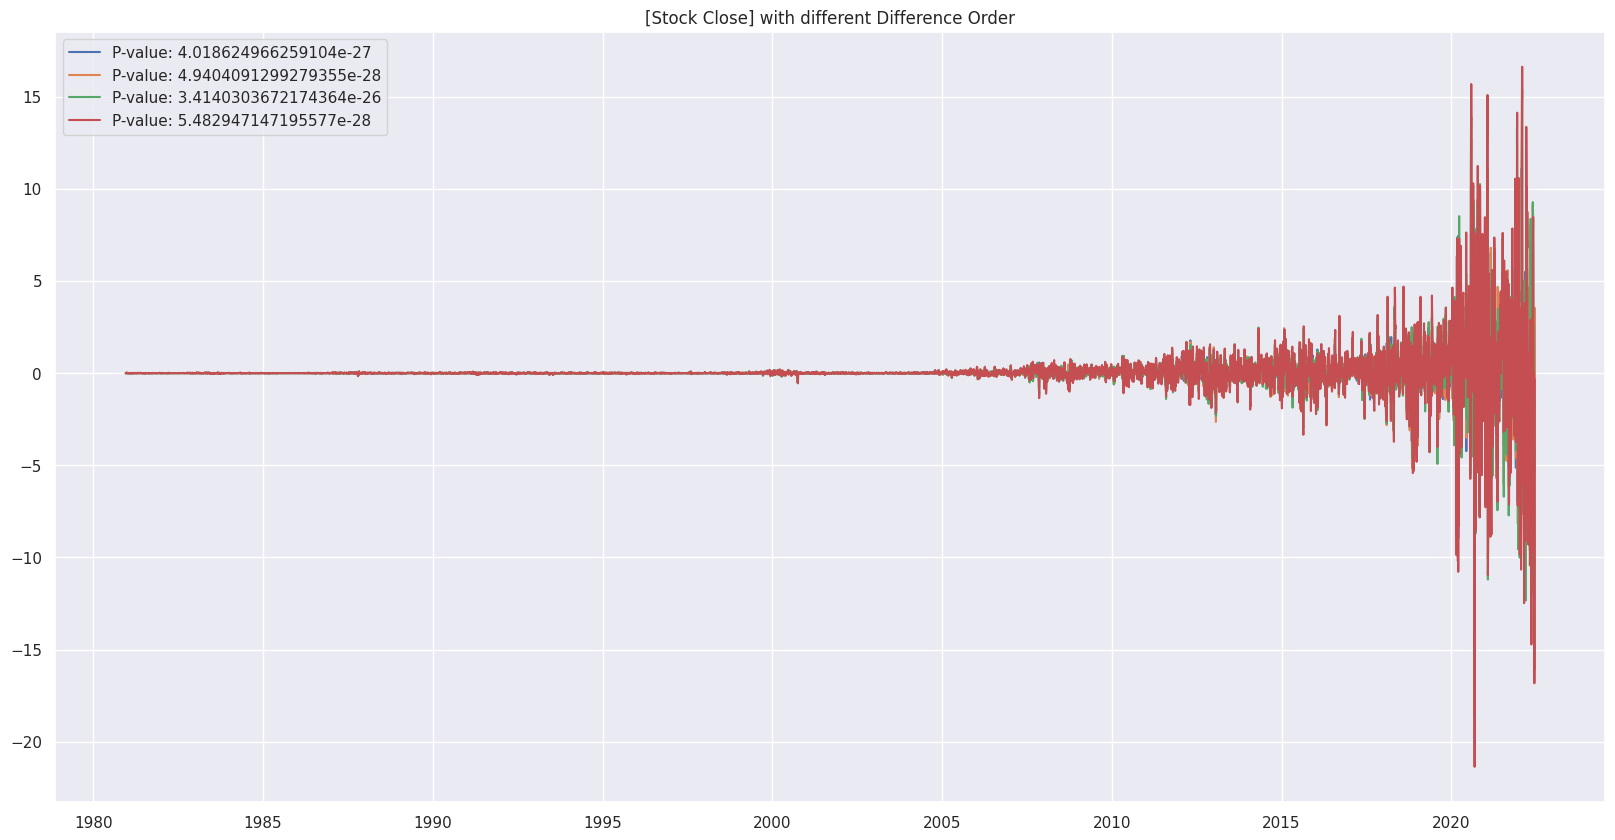

In [ ]:
plt.title('[Stock Close] with different Difference Order')

for i in range(1, 5):
    p_value = adfuller(df['Close'].diff(i)[i:])[1]
    plt.plot(df['Close'].diff(i).dropna(), label=f'P-value: {p_value}')

plt.legend();

In [ ]:
def make_stationary(data: pd.Series, alpha=0.05, max_diff=10):
    if adfuller(data)[1] < alpha:
      return {'diff_order':0, 'time_series': data}

    p_values = [(i,adfuller(data.diff(i).dropna())[1]) for i in range(1,max_diff)]

    significant = [p for p in p_values if p[1] < alpha]
    significant = sorted(significant, key=lambda x: x[1])

    diff_order = significant[0][0]

    return {'diff_order': diff_order, 'time_series': np.array(data.diff(diff_order).dropna())}

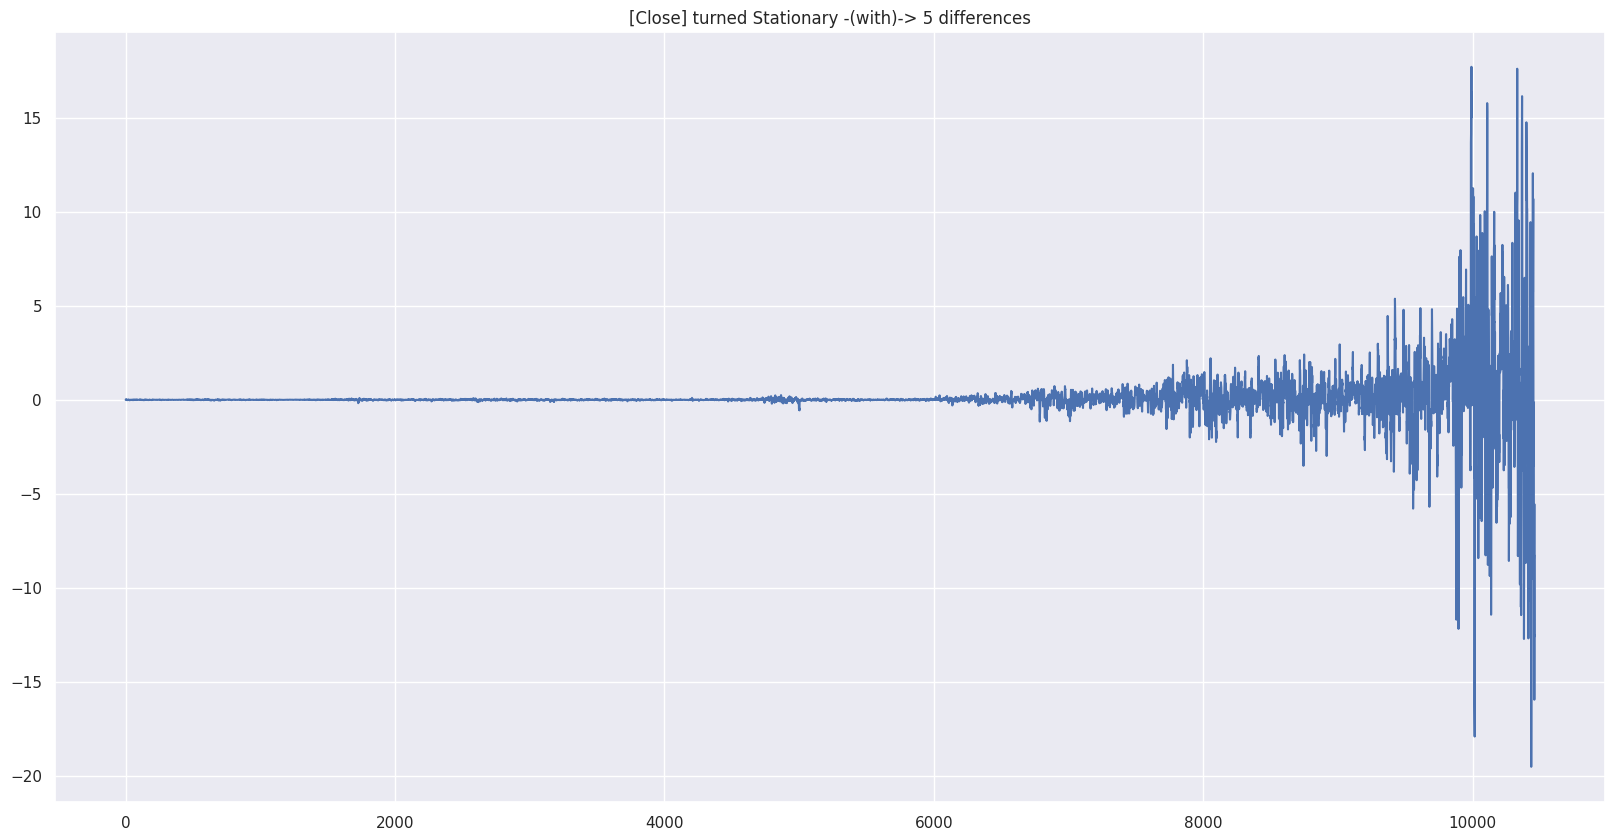

In [ ]:
data = make_stationary(df['Close'])
plt.title(f"[Close] turned Stationary -(with)-> {data['diff_order']} differences")
plt.plot(data['time_series'])

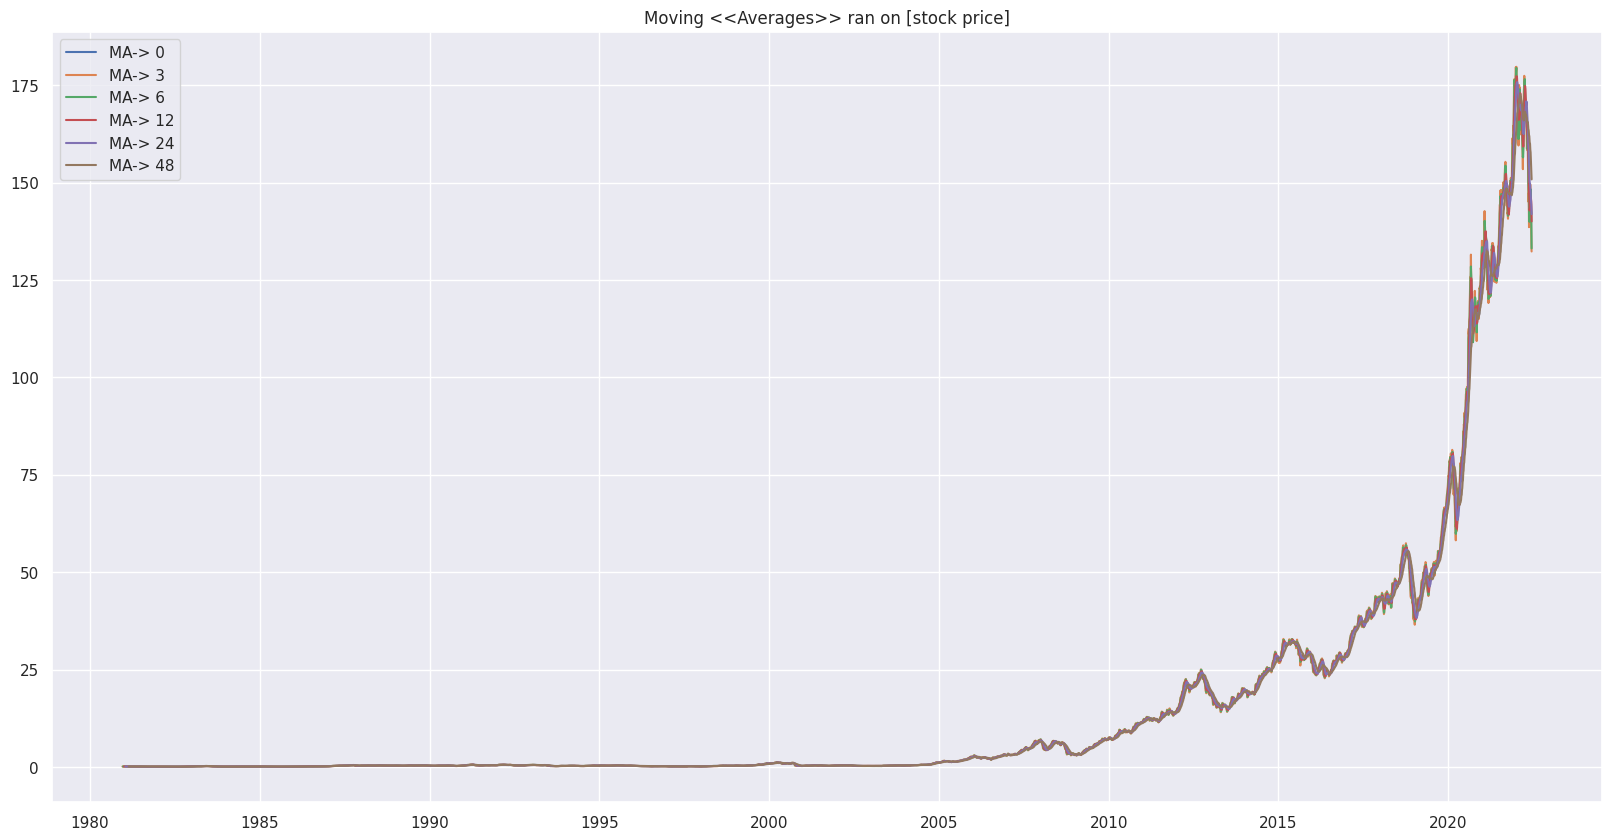

In [ ]:
plt.title('Moving <<Averages>> ran on [stock price]')

for i in [0, 3, 6, 12, 24, 48]:
    plt.plot(df.rolling(i).mean() ['Close'], label=f'MA-> {i}')

plt.legend()


> ### |> ***Run ARIMA Model***

<Axes: xlabel='Date'>

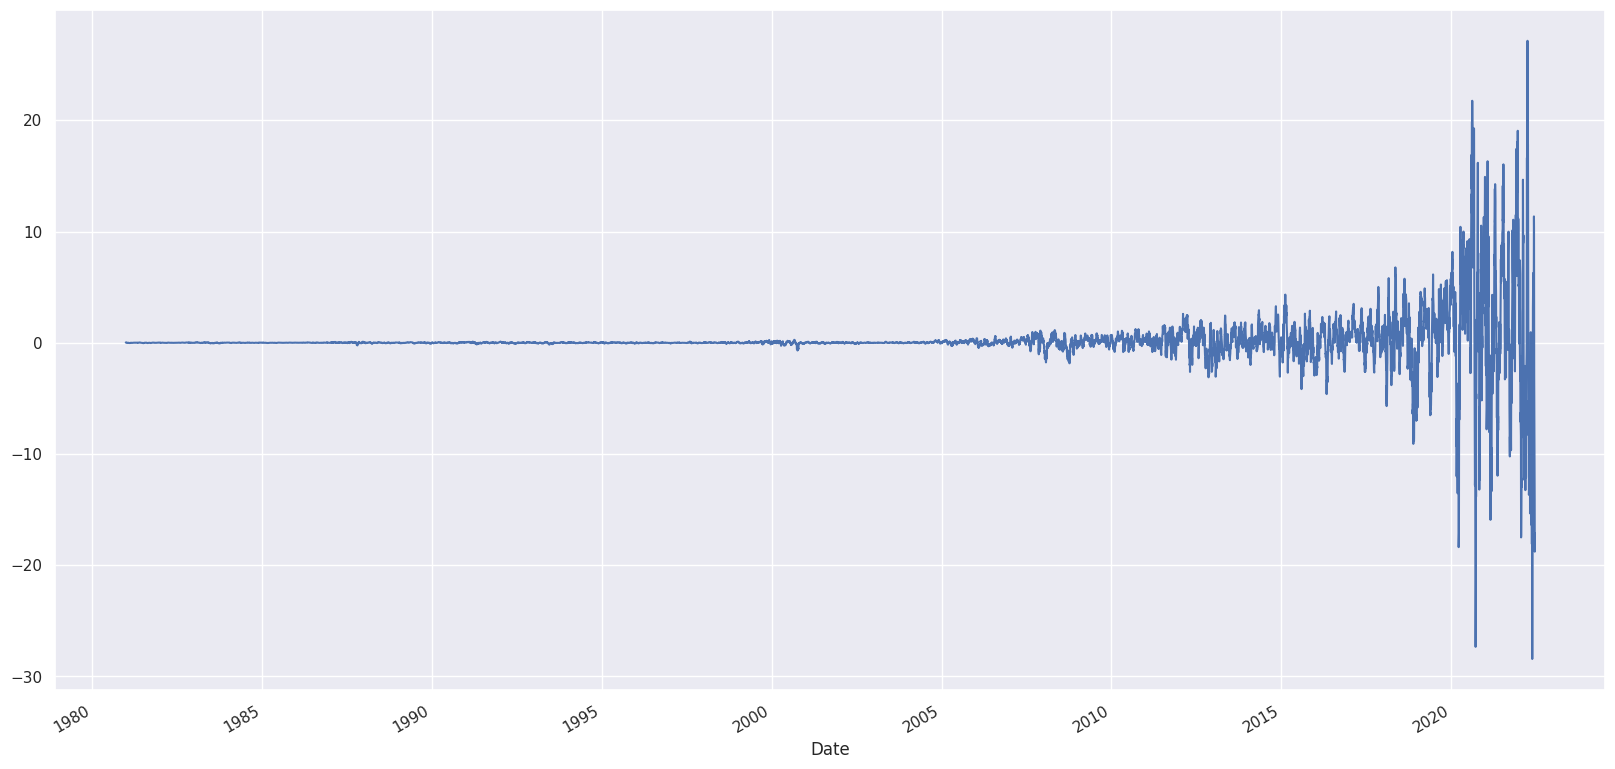

In [ ]:
seas_diff = df['Close'] - df['Close'].shift(12)
seas_diff.plot()


In [ ]:
adfuller(seas_diff.dropna())

(-12.688840141247704,
 1.1438473099733222e-23,
 39,
 10416,
 {'1%': -3.4309779677699006,
  '5%': -2.861817525620111,
  '10%': -2.5669177217435926},
 23465.36121571993)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


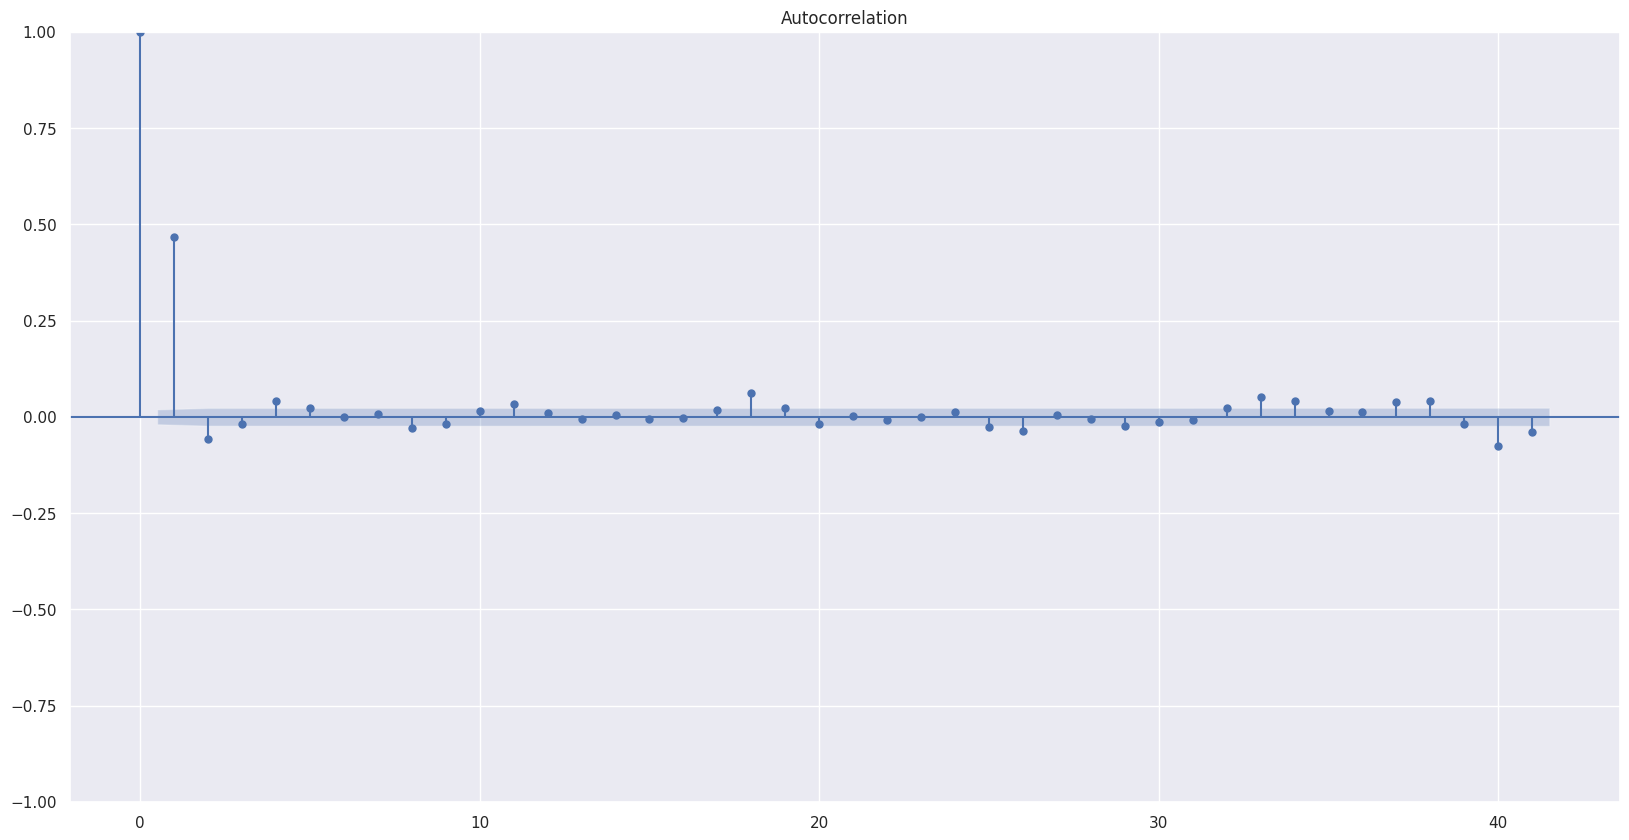

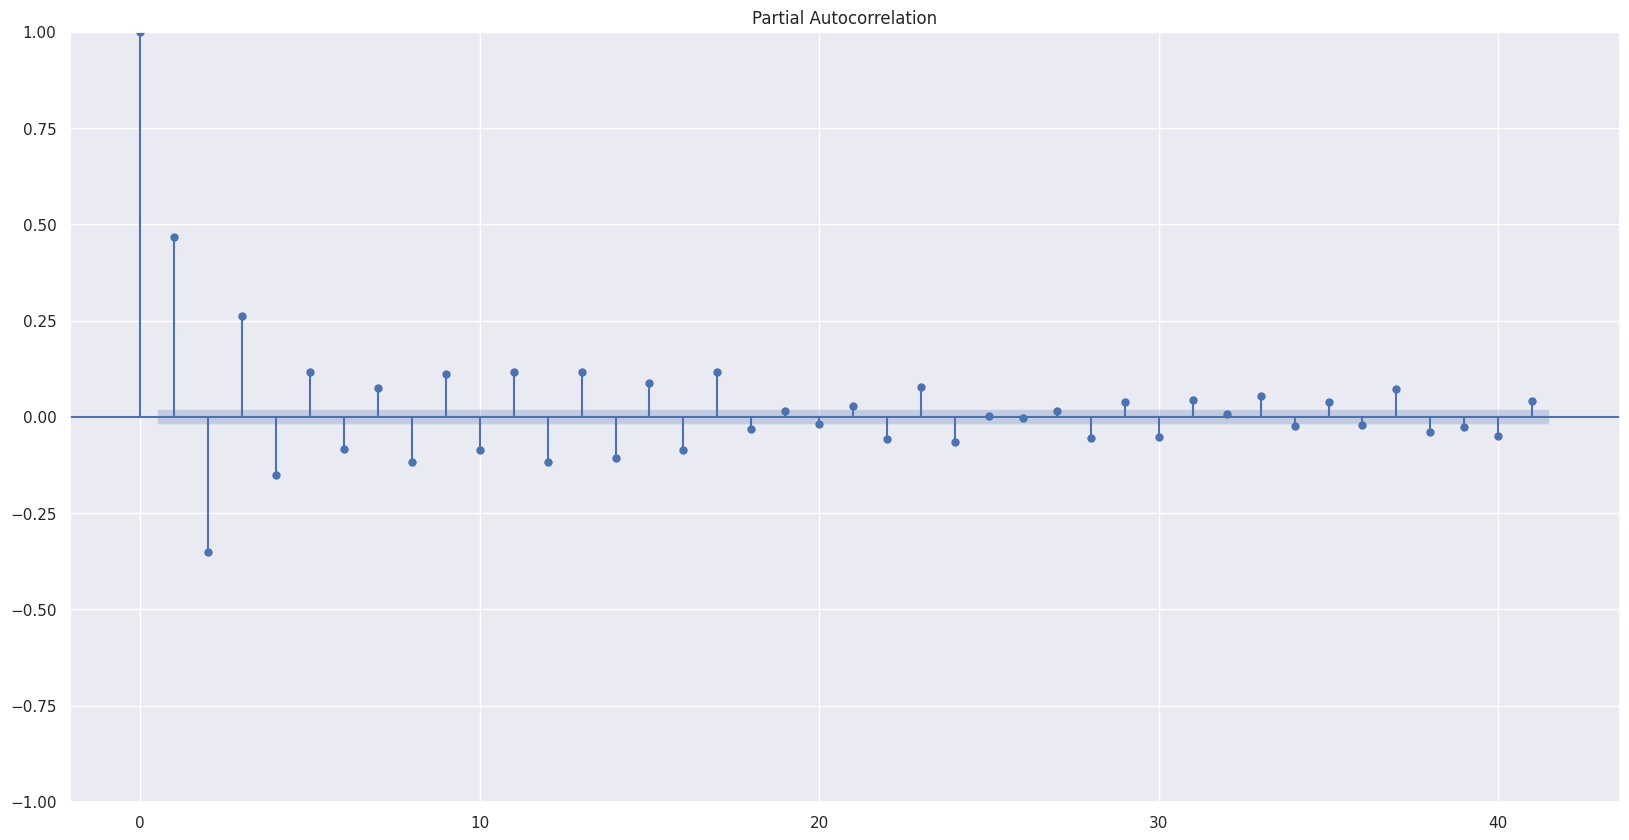

In [ ]:
plot_acf(df['Close'].diff(2).dropna())
plot_pacf(df['Close'].diff(2).dropna());

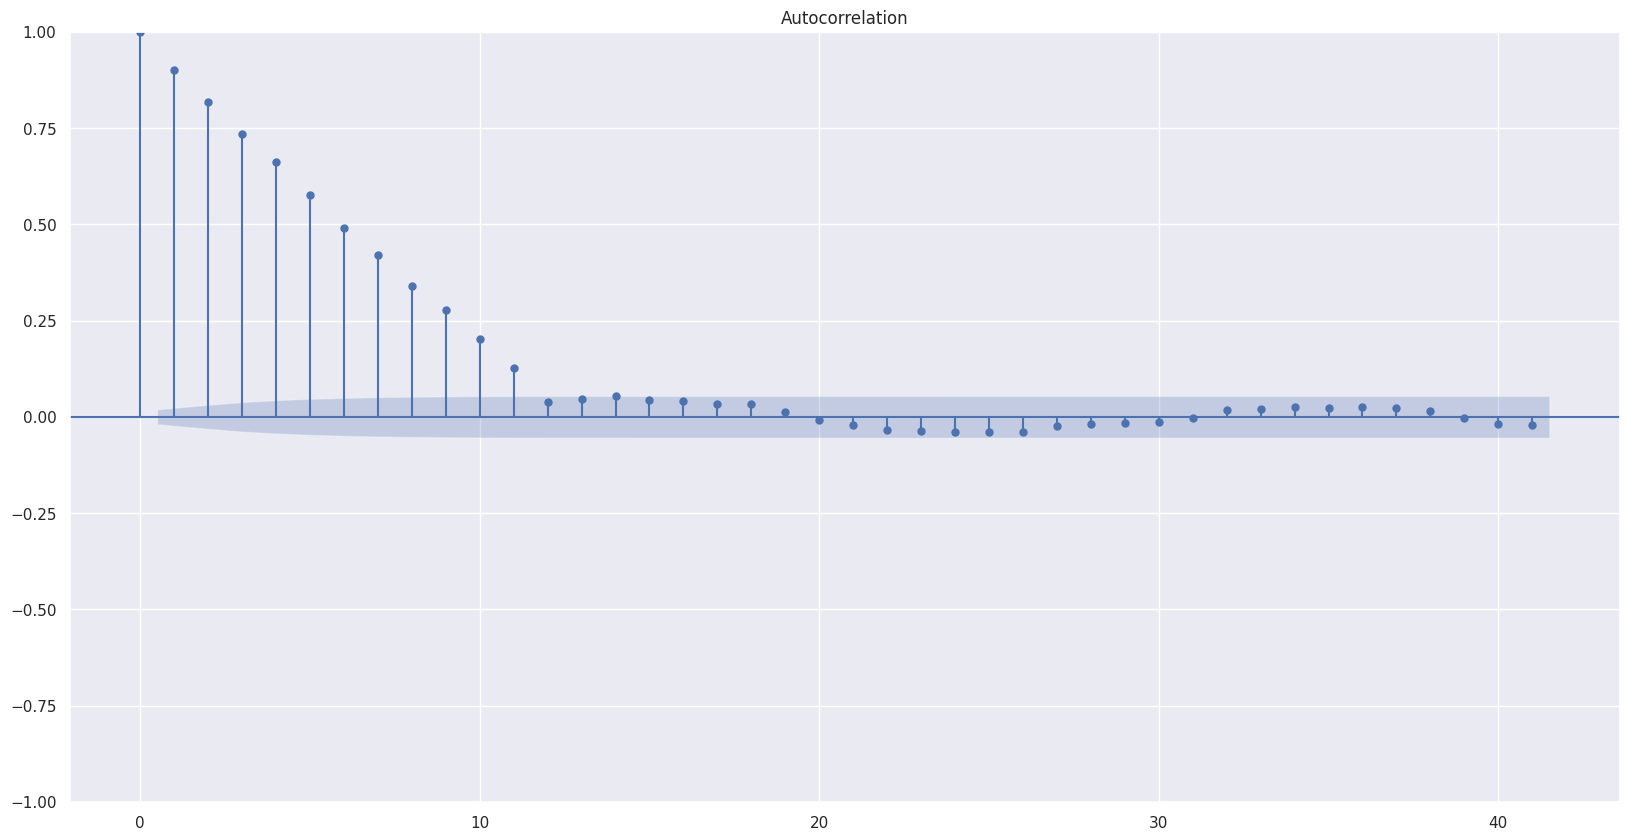

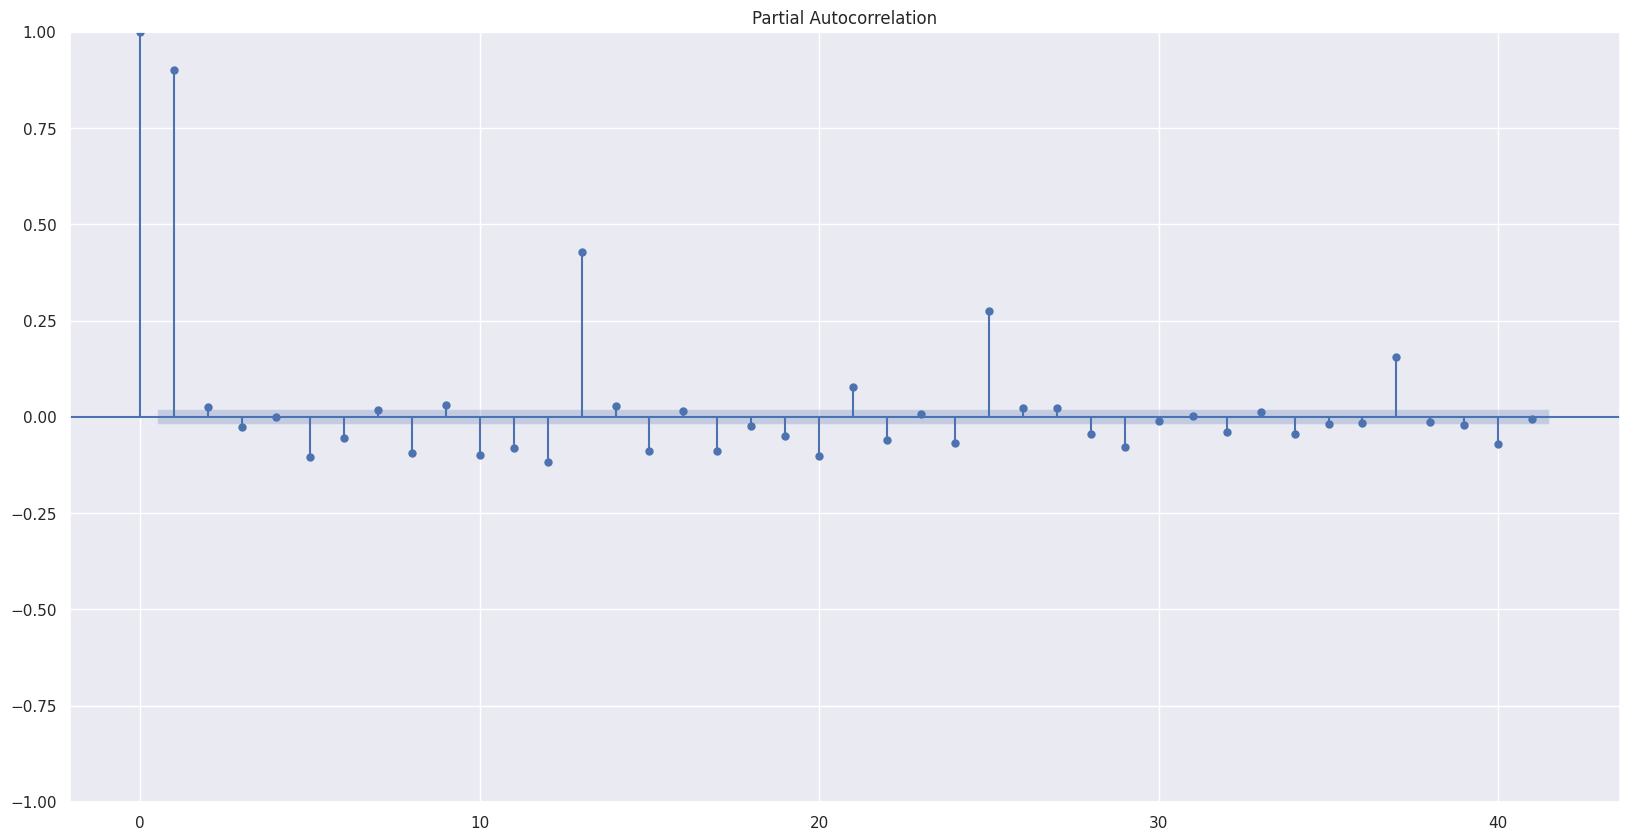

In [ ]:
plot_acf(seas_diff.dropna())
plot_pacf(seas_diff.dropna());

In [ ]:
stationary_ts = df['Close'].diff(2).dropna()
stationary_ts = stationary_ts.resample('M').mean()
train_len = int(0.7*len(stationary_ts))

In [ ]:
model = SARIMAX(stationary_ts.iloc[:train_len],
                order=(1, 2, 1),
                seasonal_order=(1, 0, 0, 12))

result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: ylabel='Density'>

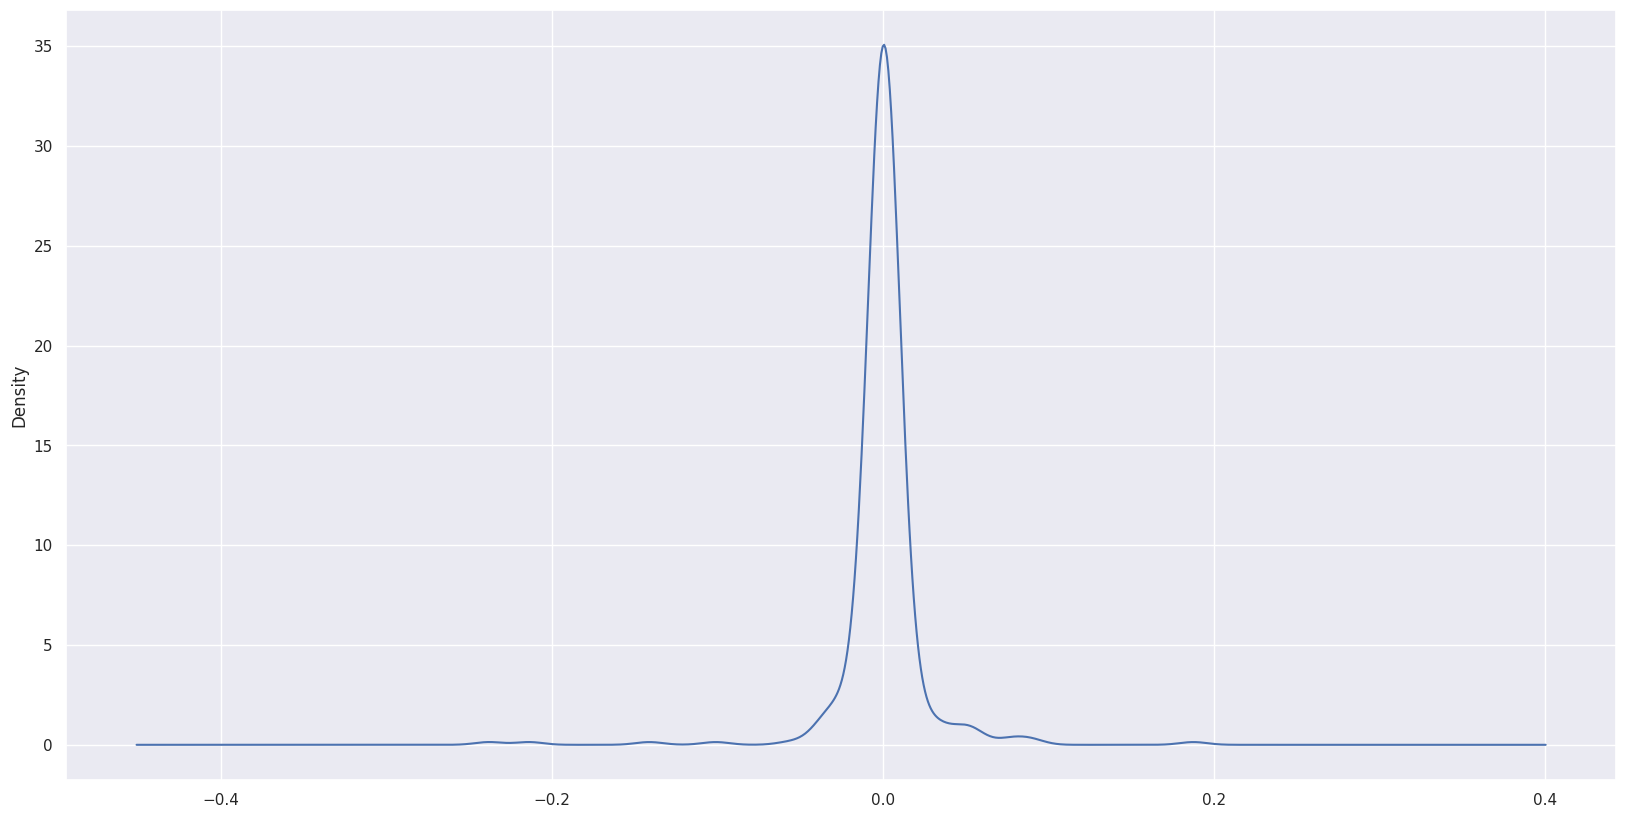

In [ ]:
result.resid.plot(kind='kde')

> ### |> ***Predicting Stock Price***


<Axes: title={'center': 'Predicting -> appleStock Price'}, xlabel='Date'>

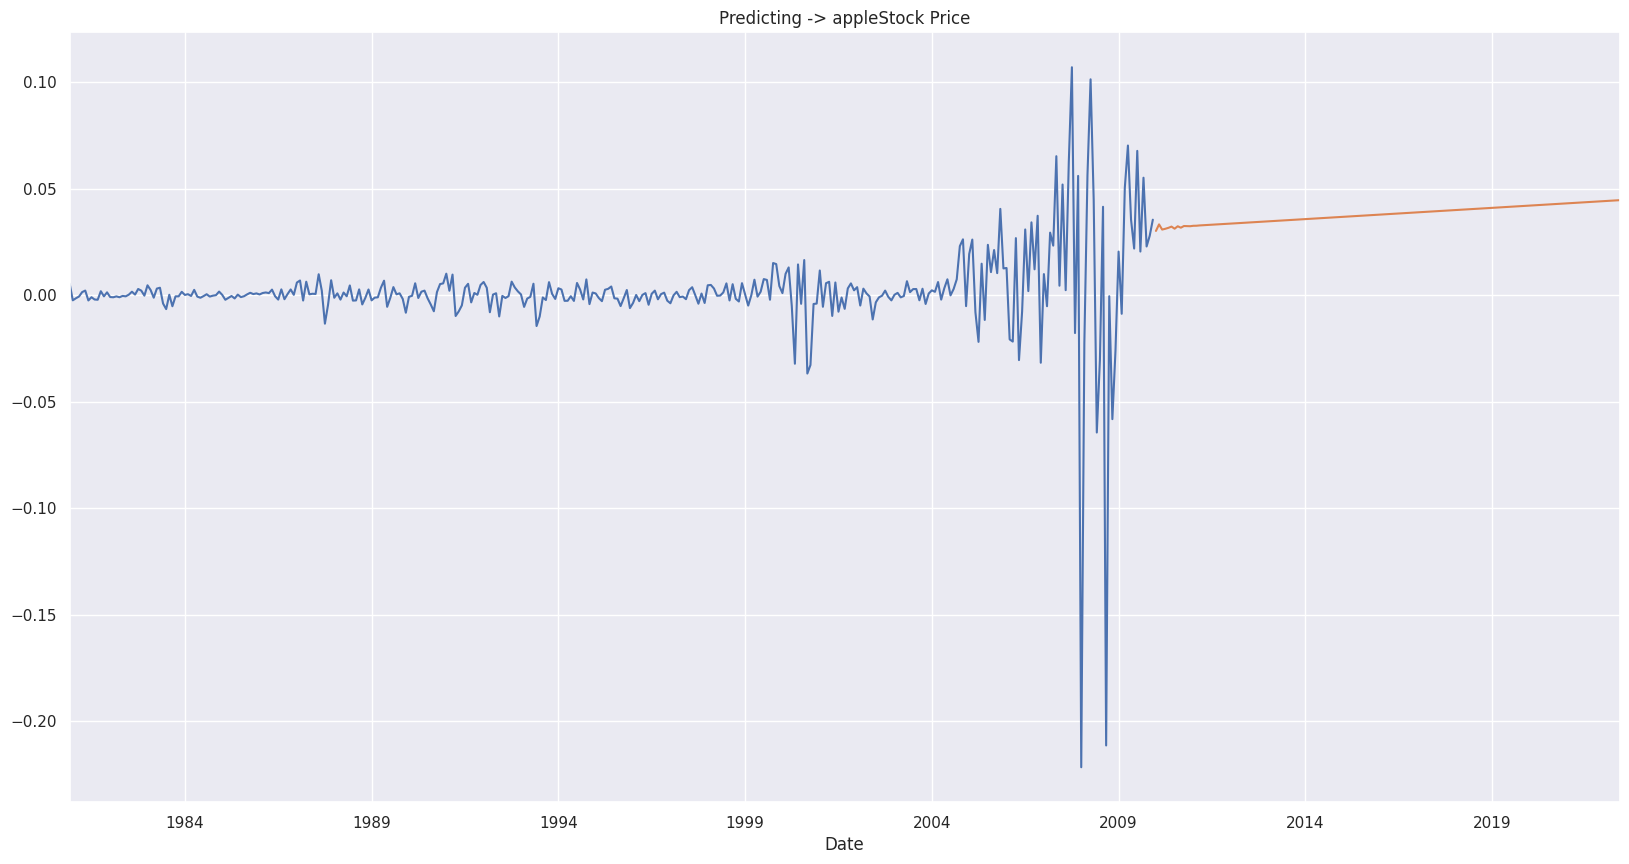

In [ ]:
start, end = stationary_ts.index.values[train_len], stationary_ts.index.values[-1]
predictions = result.predict(start=start, end=end)

plt.title('Predicting -> appleStock Price')
stationary_ts.iloc[:train_len].plot()

predictions.dropna().plot()

<Axes: title={'center': 'Comparing -> [Predicted Stock Price] vs [Actual Stock Price]'}, xlabel='Date'>

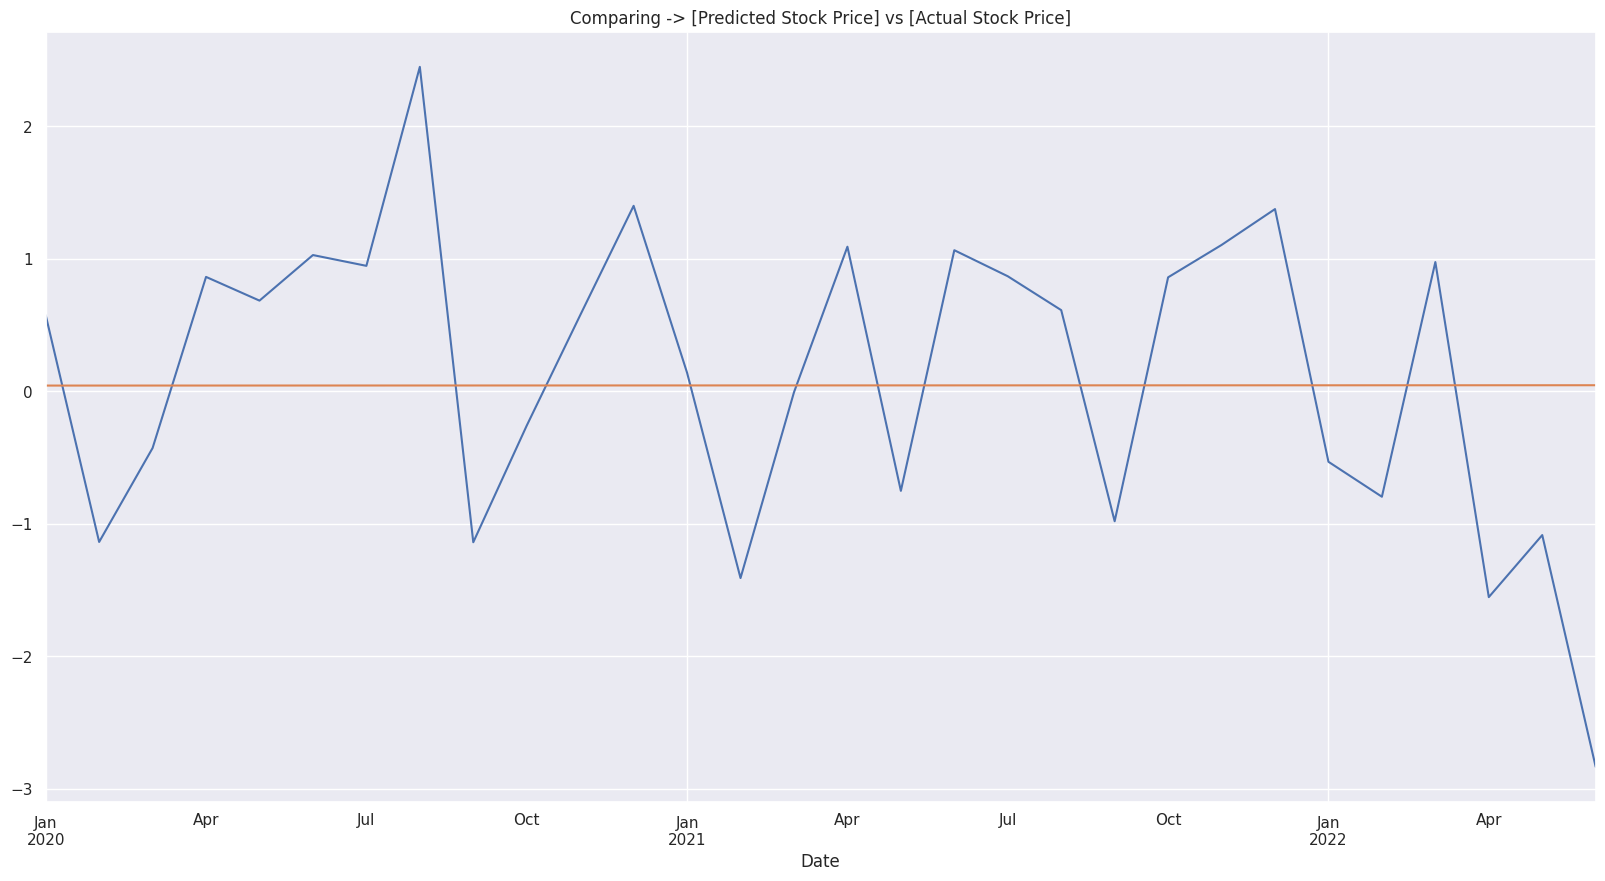

In [ ]:
plt.title('Comparing -> [Predicted Stock Price] vs [Actual Stock Price]')
stationary_ts.loc[stationary_ts.index.year > 2019].plot()
predictions.dropna().loc[predictions.index.year > 2019].plot()


---


> Summary, in order to use an ARIMA model to forecast a time series we do the following:

- Split the time series into train and test data.
- Check if the data is seasonal or not (In the case of a stock price it's most likely to be)
- Apply differencing to turn the time series into stationary by using the ADF test (keep doing so until the ADF rejects and saves the order of differencing as d for ARIMA).
- Use the autocorrelation and partial autocorrelation plot to estimate p,P and q,Q (P,Q are in case time series is seasonal)
- Fine tune using GridSearch.


---




In [ ]:
def train_arima(p, q, train_per=0.7):
    train_len = int(train_per*len(stationary_ts))
    model = SARIMAX(stationary_ts.iloc[:train_len],
                    order=(p,2,q),
                    seasonal_order=(1, 0, 0, 12))

    start,end = stationary_ts.index.values[train_len], stationary_ts.index.values[-1]
    predictions = result.predict(start=start, end=end)

    plt.title(f'Forecasting Apple stock price with values of p={p} and q={q}')
    stationary_ts.plot()
    predictions.dropna().plot()
    plt.show()

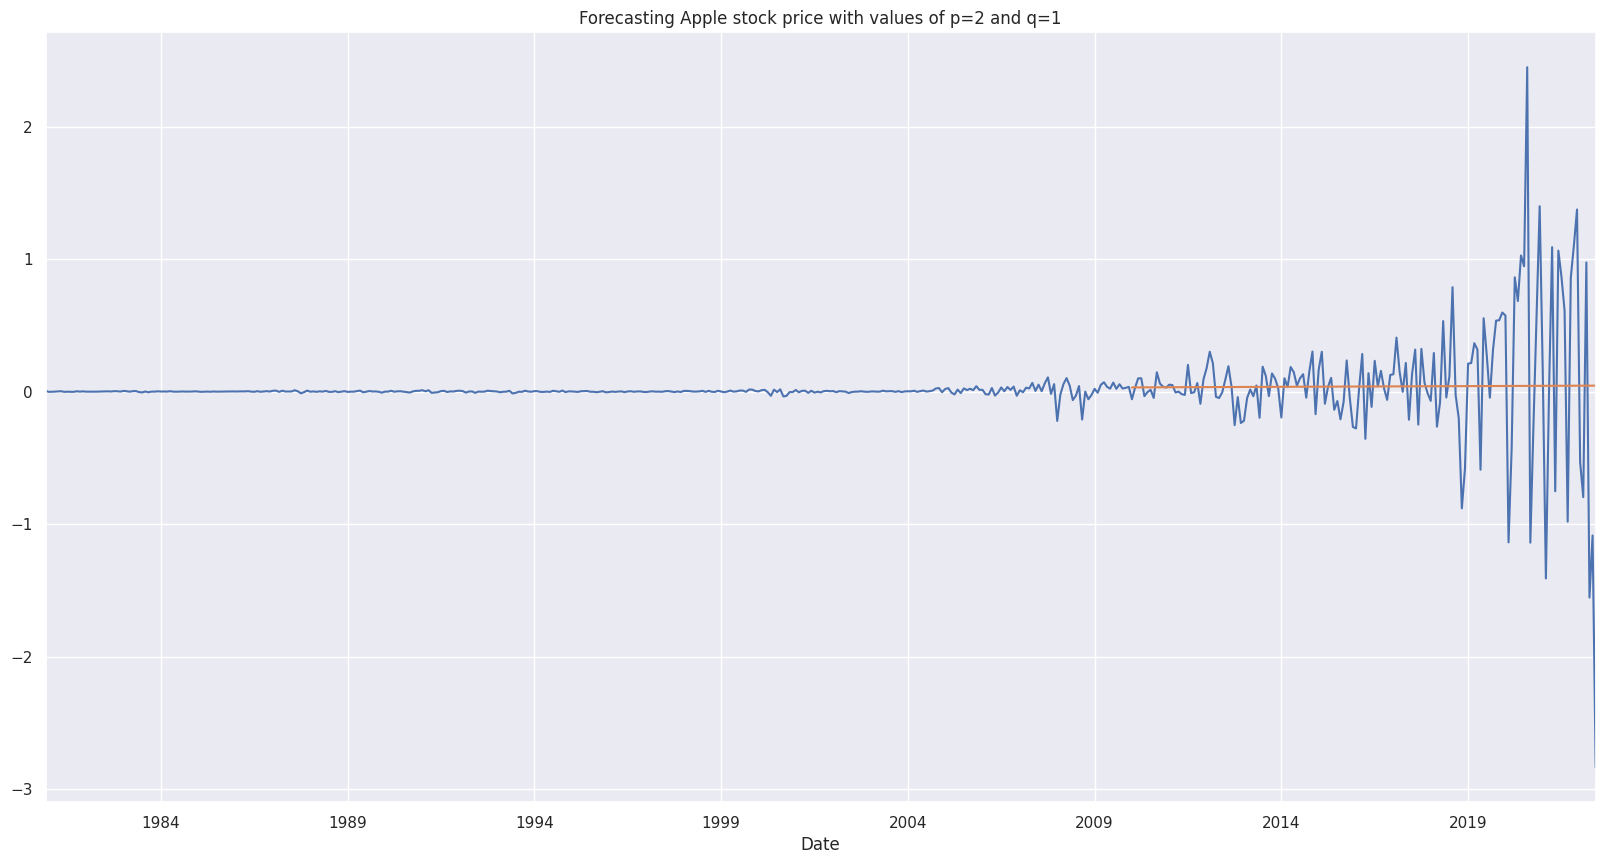

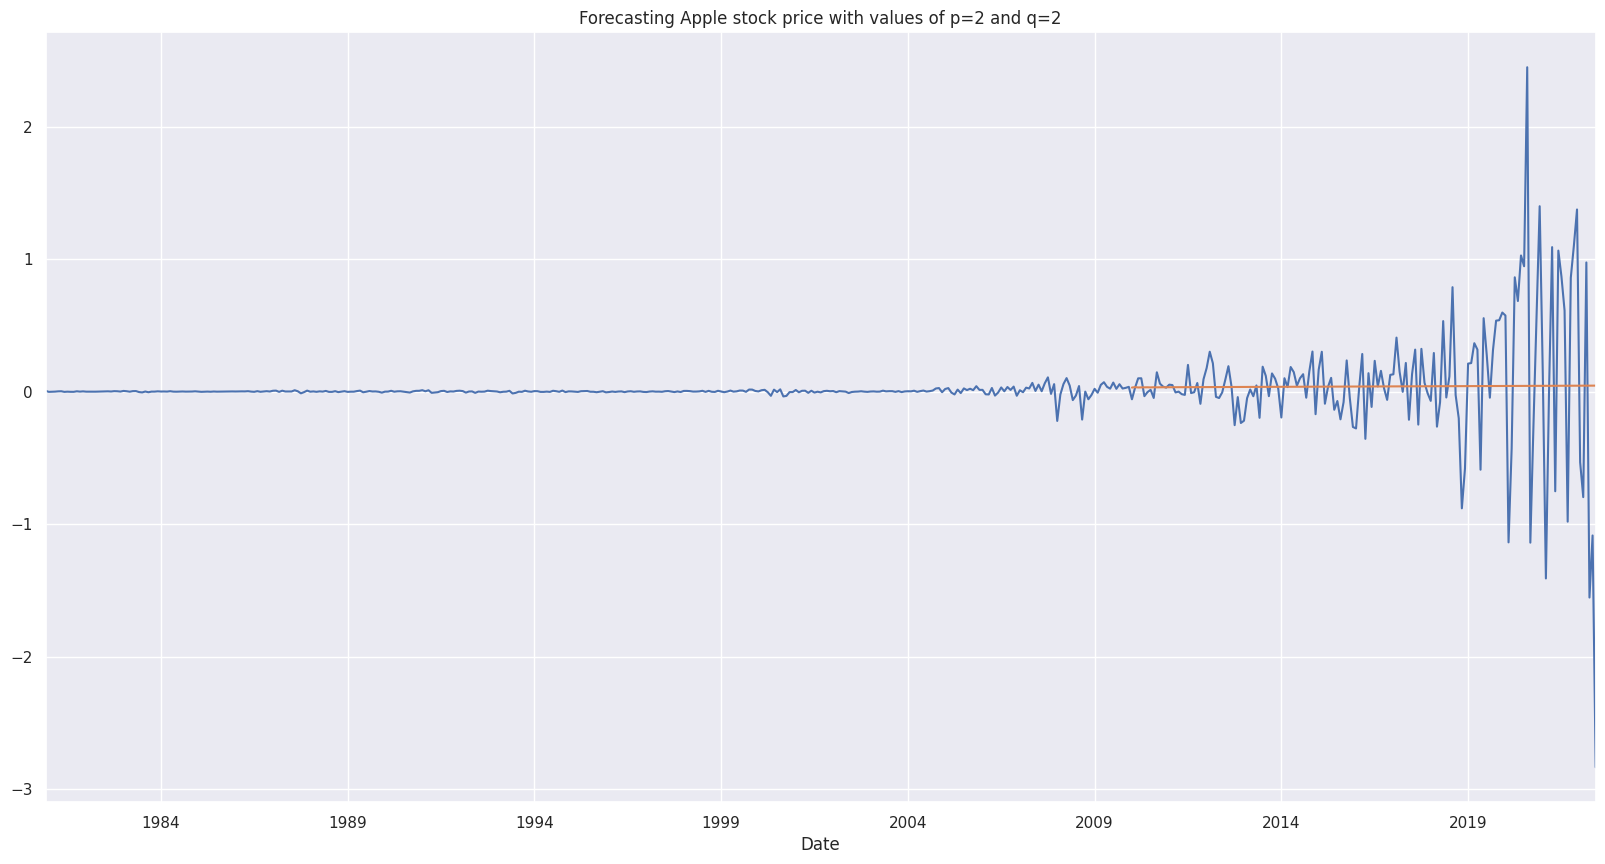

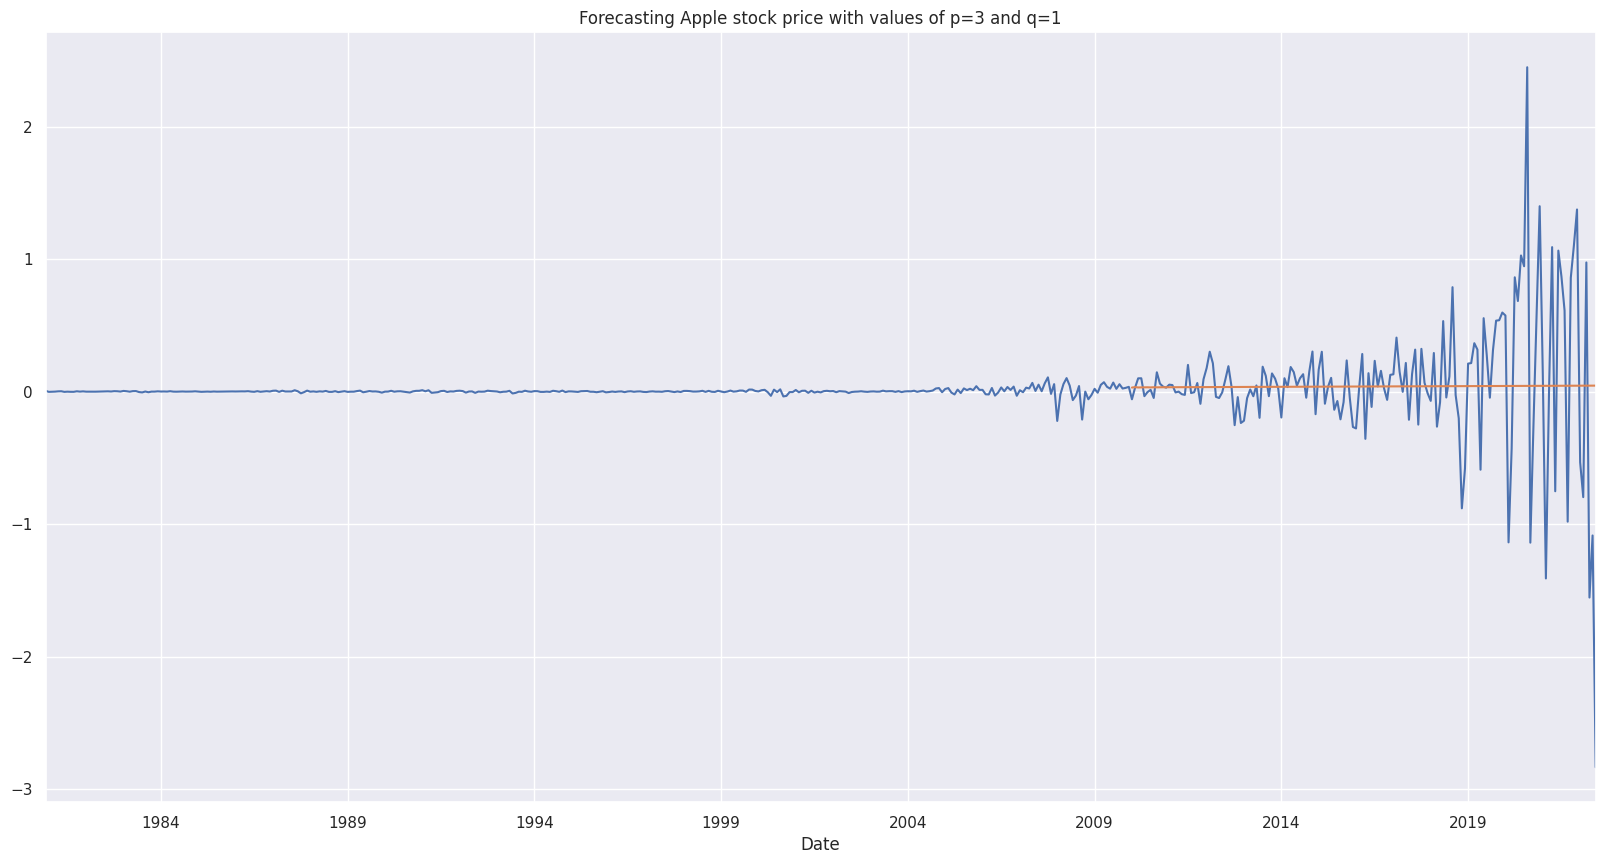

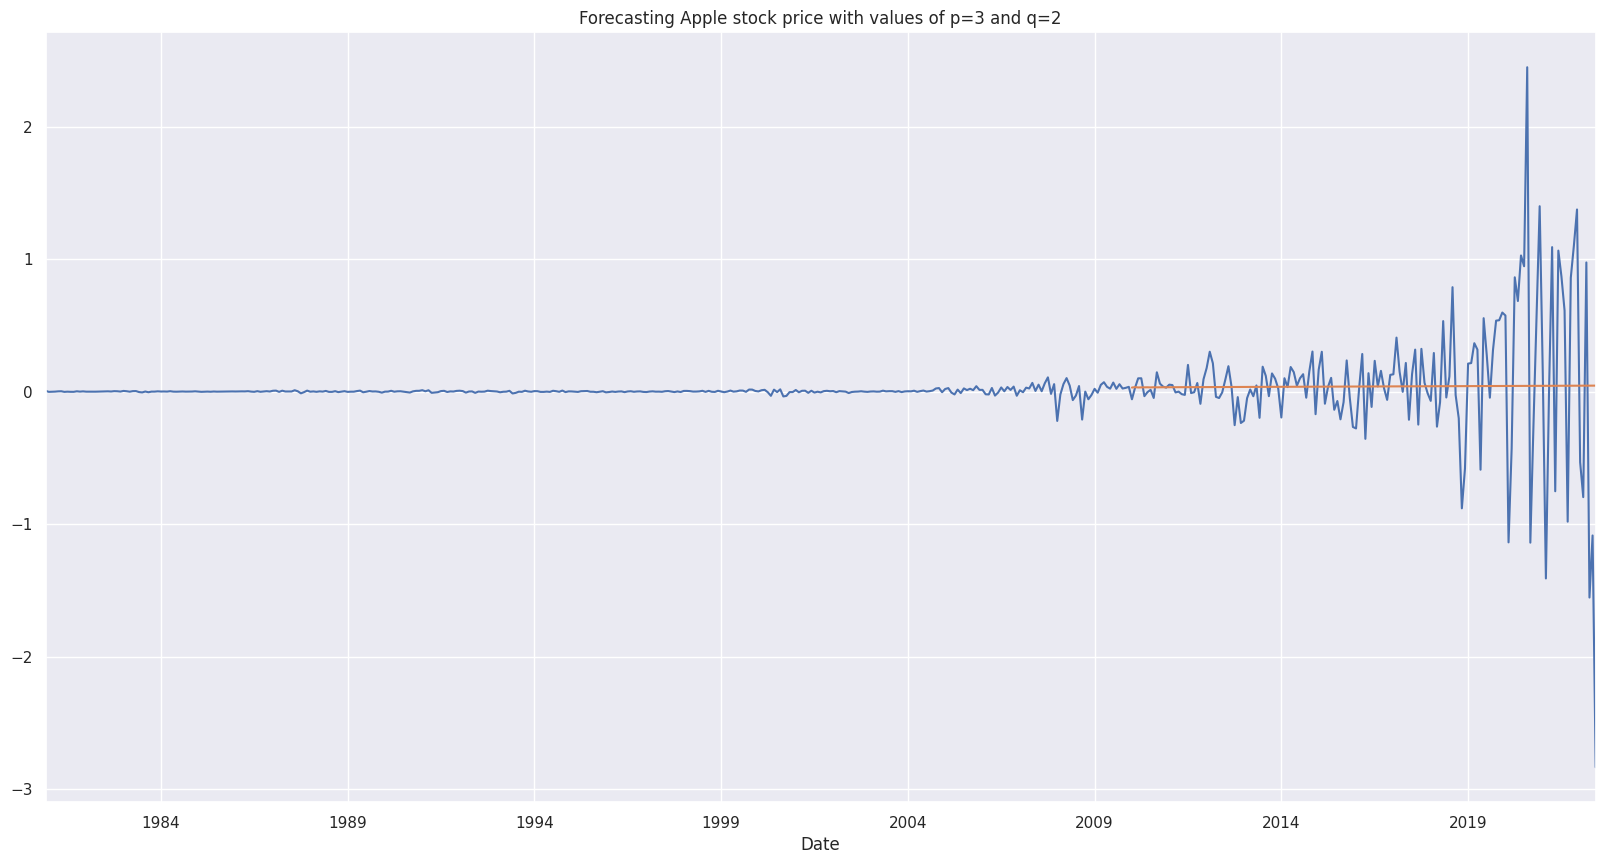

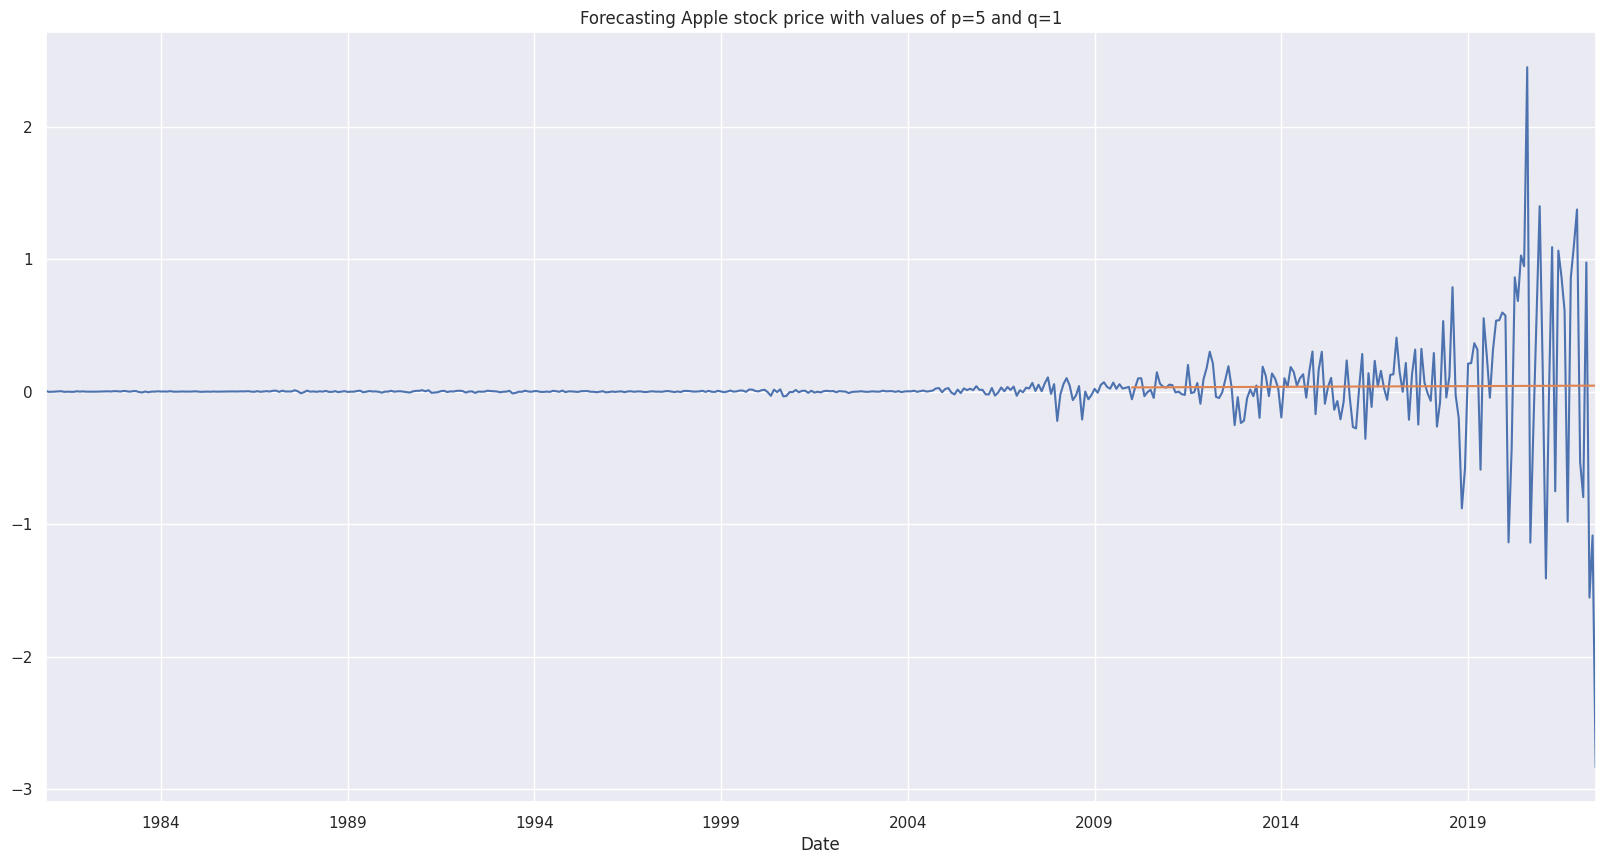

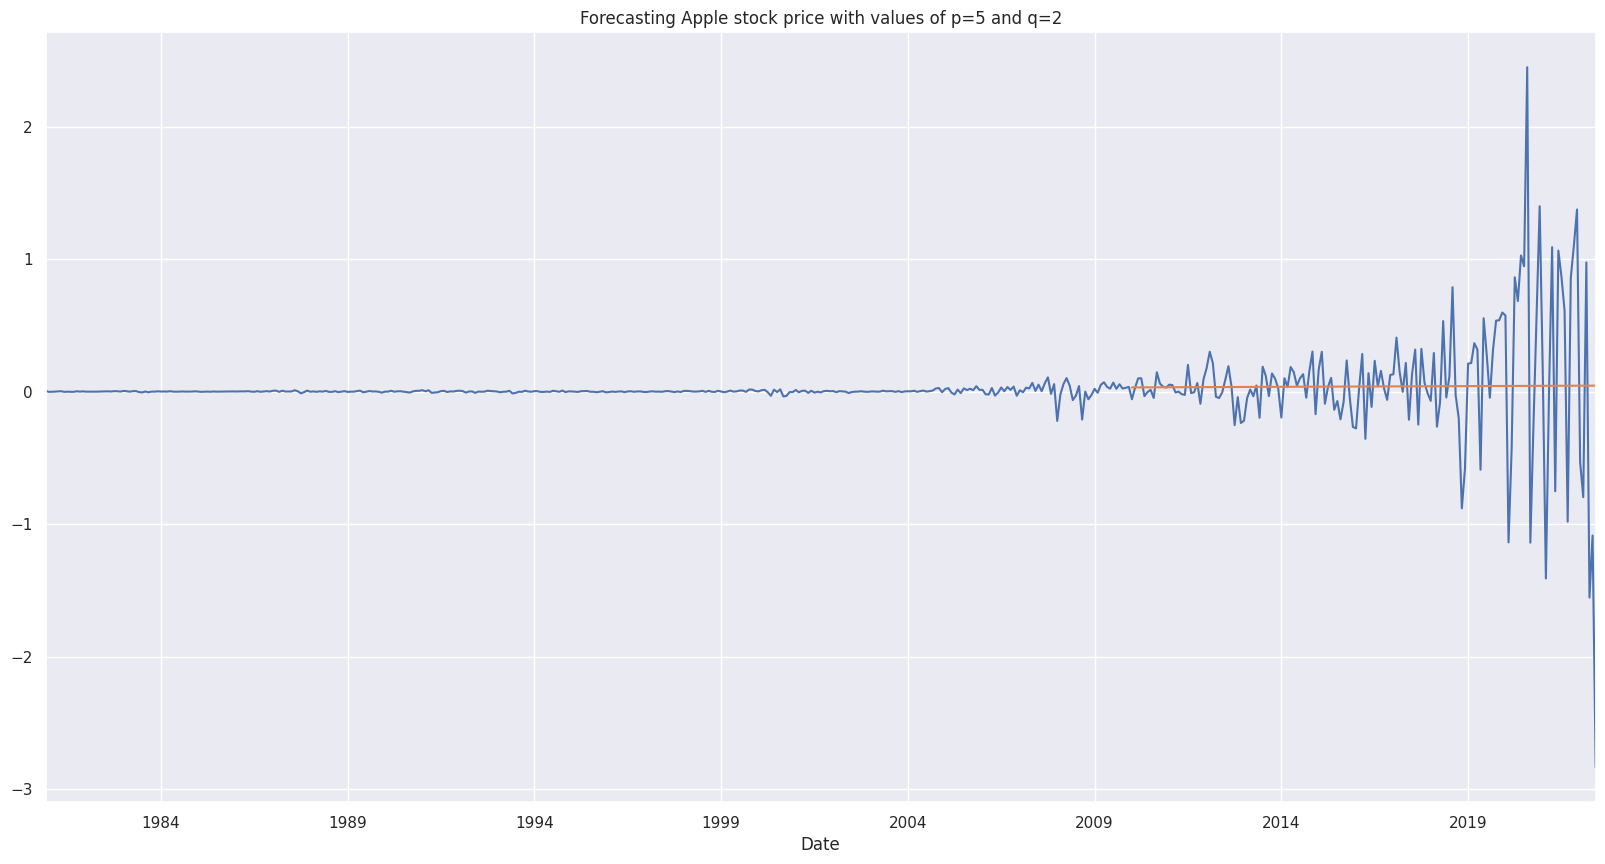

In [ ]:
for p in [2, 3, 5]:
    for q in [1, 2]:
        train_arima(p, q)
